In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# set style
plt.style.use('fivethirtyeight')

# consigure for retain display
%config InlineBackend.figure_format = 'retina'

In [2]:
# Read in data
csv_ames = r'C:\myLib\IOD\Classwork\Mini Project 2\train.csv'.replace('\\','/')

ames = pd.read_csv(csv_ames)

In [3]:
# Change columns name to lower case for easier to work

ames.columns = ames.columns.str.lower().str.replace(' ','_')

In [12]:
# Increase pandas default max_rows to view all columns
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

# Exploratory Data Analysis (EDA)

# Data Collection
Data collection is the process of gathering information in an established systematic way that enables one to test hypothesis and evaluate outcomes easily.

In [13]:
ames.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,SawyerW,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,VinylSd,VinylSd,BrkFace,132.0,Gd,TA,PConc,Gd,TA,No,GLQ,637.0,Unf,0.0,276.0,913.0,GasA,Ex,Y,SBrkr,913,1209,0,2122,1.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,Attchd,1997.0,RFn,2.0,559.0,TA,TA,Y,0,74,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1953,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,Gd,CBlock,TA,TA,No,GLQ,731.0,Unf,0.0,326.0,1057.0,GasA,TA,Y,SBrkr,1057,0,0,1057,1.0,0.0,1,0,3,1,Gd,5,Typ,0,NaN,Detchd,1953.0,Unf,1.0,246.0,TA,TA,Y,0,52,0,0,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,2Story,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,384.0,384.0,GasA,Gd,Y,SBrkr,744,700,0,1444,0.0,0.0,2,1,3,1,TA,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2.0,400.0,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1.5Fin,6,8,1900,1993,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,PConc,Fa,Gd,No,Unf,0.0,Unf,0.0,676.0,676.0,GasA,TA,Y,SBrkr,831,614,0,1445,0.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Detchd,1957.0,Unf,2.0,484.0,TA,TA,N,0,59,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [16]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     1721 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            140 non-null    object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [22]:
ames.columns

Index(['id', 'pid', 'ms_subclass', 'ms_zoning', 'lot_frontage', 'lot_area',
       'street', 'alley', 'lot_shape', 'land_contour', 'utilities',
       'lot_config', 'land_slope', 'neighborhood', 'condition_1',
       'condition_2', 'bldg_type', 'house_style', 'overall_qual',
       'overall_cond', 'year_built', 'year_remod/add', 'roof_style',
       'roof_matl', 'exterior_1st', 'exterior_2nd', 'mas_vnr_type',
       'mas_vnr_area', 'exter_qual', 'exter_cond', 'foundation', 'bsmt_qual',
       'bsmt_cond', 'bsmt_exposure', 'bsmtfin_type_1', 'bsmtfin_sf_1',
       'bsmtfin_type_2', 'bsmtfin_sf_2', 'bsmt_unf_sf', 'total_bsmt_sf',
       'heating', 'heating_qc', 'central_air', 'electrical', '1st_flr_sf',
       '2nd_flr_sf', 'low_qual_fin_sf', 'gr_liv_area', 'bsmt_full_bath',
       'bsmt_half_bath', 'full_bath', 'half_bath', 'bedroom_abvgr',
       'kitchen_abvgr', 'kitchen_qual', 'totrms_abvgrd', 'functional',
       'fireplaces', 'fireplace_qu', 'garage_type', 'garage_yr_blt',
       'g

In [19]:
ames.describe(include='all').T # Summary statistics

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,2051.0,NaN,NaN,NaN,1474.033642,843.980841,1.0,753.5,1486.0,2198.0,2930.0
pid,2051.0,NaN,NaN,NaN,713590006.091663,188691837.88533,526301100.0,528458140.0,535453200.0,907180080.0,924152030.0
ms_subclass,2051.0,NaN,NaN,NaN,57.008776,42.824223,20.0,20.0,50.0,70.0,190.0
ms_zoning,2051,7,RL,1598,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_frontage,1721.0,NaN,NaN,NaN,69.0552,23.260653,21.0,58.0,68.0,80.0,313.0
lot_area,2051.0,NaN,NaN,NaN,10065.208191,6742.488909,1300.0,7500.0,9430.0,11513.5,159000.0
street,2051,2,Pave,2044,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alley,140,2,Grvl,85,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lot_shape,2051,4,Reg,1295,NaN,NaN,NaN,NaN,NaN,NaN,NaN
land_contour,2051,4,Lvl,1843,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
ames.shape # 2051 rows and 81 columns

(2051, 81)

# Data Cleaning
Data cleaning is the process of ensuring that your data is correct and useable by identifying any errors in the data, or missing data by correcting or deleting them.

# Handle Missing data
In statistics, missing data, or missing values, occur when no data value is stored/provided for the variable in an observation. Missing data is a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.

In [23]:
missing_count = ames.isnull().sum() # the count of missing values
value_count = ames.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100,2) # the percentage of missing values
missing_ames_train_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) # create a dataframe
print('missing ames data')
print(missing_ames_train_df)

missing ames data
                 count  percentage
id                   0        0.00
pid                  0        0.00
ms_subclass          0        0.00
ms_zoning            0        0.00
lot_frontage       330       16.09
lot_area             0        0.00
street               0        0.00
alley             1911       93.17
lot_shape            0        0.00
land_contour         0        0.00
utilities            0        0.00
lot_config           0        0.00
land_slope           0        0.00
neighborhood         0        0.00
condition_1          0        0.00
condition_2          0        0.00
bldg_type            0        0.00
house_style          0        0.00
overall_qual         0        0.00
overall_cond         0        0.00
year_built           0        0.00
year_remod/add       0        0.00
roof_style           0        0.00
roof_matl            0        0.00
exterior_1st         0        0.00
exterior_2nd         0        0.00
mas_vnr_type        22        1.07
ma

# Deal with missing data - Lot Frontage

In [27]:
# Lot Frontage

ames.lot_frontage.value_counts().head() # Linear feet of street connected to property

60.0    179
70.0     96
80.0     94
50.0     90
65.0     71
Name: lot_frontage, dtype: int64

In [30]:
# Apply filter to examine only null values

lot_frontage_nulls = ames[ames.lot_frontage.isna()] # lots with no linear feet of street connected to property

# These appear to be real properties. Setting to average for the corrosponding type of lot_config

lot_frontage_nulls

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Sawyer,RRAe,Norm,1Fam,2Story,6,8,1976,2005,Gable,CompShg,HdBoard,Plywood,BrkFace,289.0,Gd,TA,CBlock,TA,TA,No,GLQ,533.0,Unf,0.0,192.0,725.0,GasA,Ex,Y,SBrkr,725,754,0,1479,0.0,0.0,2,1,3,1,Gd,6,Typ,0,NaN,Attchd,1976.0,RFn,2.0,475.0,TA,TA,Y,0,44,0,0,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000.0,Unf,0.0,188.0,1188.0,GasA,Fa,Y,SBrkr,1188,0,0,1188,1.0,0.0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,1959.0,RFn,2.0,531.0,TA,TA,Y,0,0,0,0,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1Story,5,5,1952,1952,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,292.0,Unf,0.0,632.0,924.0,GasA,TA,Y,SBrkr,924,0,0,924,0.0,0.0,1,0,2,1,TA,6,Typ,0,NaN,Detchd,1952.0,Unf,1.0,420.0,TA,TA,Y,0,324,0,0,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,1Story,6,7,1992,2007,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Gd,PConc,Gd,TA,No,ALQ,935.0,Unf,0.0,233.0,1168.0,GasA,Ex,Y,SBrkr,1187,0,0,1187,1.0,0.0,2,0,3,1,TA,6,Typ,0,NaN,Attchd,1992.0,Fin,2.0,420.0,TA,TA,Y,483,21,0,0,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,1.5Fin,5,6,1937,1995,Gable,CompShg,WdShing,Wd Shng,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,606.0,Unf,0.0,336.0,942.0,GasA,Ex,Y,SBrkr,1265,673,0,1938,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Gd,Detchd,1937.0,Unf,1.0,240.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,198000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016,560,532376110,20,RL,NaN,7791,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,1Fam,1Story,5,8,1963,1995,Gable,CompShg,Plywood,Plywood,None,0.0,Gd,Gd,CBlock,TA,TA,No,ALQ,624.0,Unf,0.0,288.0,912.0,GasA,Ex,Y,SBrkr,912,0,0,912,1.0,0.0,1,0,3,1,Gd,6,Typ,0,NaN,Attchd,1963.0,RFn,1.0,300.0,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,10,2009,WD,129000
2022,2872,909475020,20,RL,NaN,16381,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,5,1969,1969,Gable,CompShg,Plywood,Plywood,BrkFace,312.0,Gd,Gd,CBlock,TA,TA,Av,Rec,1110.0,Unf,0.0,734.0,1844.0,GasA,Gd,Y,SBrkr,1844,0,0,1844,1.0,0.0,2,0,3,1,Gd,7,Typ,1,TA,Attchd,1969.0,RFn,2.0,540.0,TA,TA,Y,0,73,216,0,0,0,NaN,NaN,NaN,0,12,2006,WD,223000
2028,2526,534127190,20,RL,NaN,20781,Pave,NaN,IR2,Lvl,AllPub,CulDSac,Gtl,NWAmes,PosN,Norm,1Fam,1Story,7,7,1968,2003,Hip,CompShg,BrkFace,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,297.0,Rec,68.0,1203.0,1568.0,GasA,TA,Y,SBrkr,2156,0,0,2156,0.0,0.0,2,0,3,1,TA,9,Typ,1,Gd,Attchd,1968.0,RFn,2.0,508.0,G

In [28]:
# Group lots by configuration

grouped_lots_frontage = ames.groupby(['lot_config']).agg({'lot_frontage': 'mean'})

grouped_lots_frontage

,lot_frontage
lot_config,
Corner,83.245552
CulDSac,55.228571
FR2,60.836735
FR3,87.000000
Inside,66.952780


In [31]:
# Decide to impute the missing values with the mean for that lot configuration type
# Replace np.nan with average for lot_config of that type

ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'Corner'), 'lot_frontage'] = 83.245552
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'CulDSac'), 'lot_frontage'] = 55.228571
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'FR2'), 'lot_frontage'] = 60.836735
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'FR3'), 'lot_frontage'] = 87.000000
ames.loc[(ames['lot_frontage'].isna()) & (ames['lot_config'] == 'Inside'), 'lot_frontage'] = 66.952780

In [32]:
# Check to make sure all null values are taken care of

ames.lot_frontage.isna().sum()

0

In [33]:
# looking at outliers

ames.lot_frontage.sort_values().tail()

1263    174.0
441     195.0
1875    200.0
960     313.0
1335    313.0
Name: lot_frontage, dtype: float64

In [34]:
# Make a note of potential outliers to drop

x_frontage_maybe_drop = ames[ames.lot_frontage == 313]
x_frontage_maybe_drop

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
960,1499,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,Gtl,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,Ex,TA,PConc,Ex,TA,Gd,GLQ,5644.0,Unf,0.0,466.0,6110.0,GasA,Ex,Y,SBrkr,4692,950,0,5642,2.0,0.0,2,1,3,1,Ex,12,Typ,3,Gd,Attchd,2008.0,Fin,2.0,1418.0,TA,TA,Y,214,292,0,0,0,480,Gd,NaN,NaN,0,1,2008,New,160000
1335,1266,535427070,20,RL,313.0,27650,Pave,NaN,IR2,HLS,AllPub,Inside,Mod,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,Gd,TA,Gd,GLQ,425.0,Unf,0.0,160.0,585.0,GasA,Ex,Y,SBrkr,2069,0,0,2069,1.0,0.0,2,0,4,1,Gd,9,Typ,1,Gd,Attchd,1960.0,RFn,2.0,505.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,11,2008,WD,242000


# Deal with missing data - Alley

In [35]:
# Then move on to the next column feature, ‘Alley’

ames.alley.isnull().sum() # 1911 null values

1911

In [43]:
# The null values should be NA according to the data dictionary, meaning these houses have no alley.
# Type of alley access to property (1) Grvl Gravel (2) Pave Paved (3) NA No alley access

ames.groupby(['alley']).agg({'alley': 'count'})

,alley
alley,
Grvl,85
Pave,55


In [62]:
ames.alley.unique()

array(['NA', 'Pave', 'Grvl'], dtype=object)

In [44]:
ames.alley = ames.alley.replace(np.nan, 'NA')

In [45]:
# Check to make sure all null values are taken care of

ames.alley.value_counts()

NA      1911
Grvl      85
Pave      55
Name: alley, dtype: int64

# Deal with missing data - Masonry Veneer Type & Area
Masonry veneer walls consist of a single non-structural external layer of masonry, typically made of brick, stone or manufactured stone

In [63]:
ames.mas_vnr_type.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [50]:
# Next, mas_vnr_type & mas_vnr_area also known as Masonry veneer type and area.

# MasVnrType: Masonry veneer type (1) BrkCmn Brick Common (2) BrkFace Brick Face (3) CBlock Cinder Block (4) None None (5) Stone Stone

ames.mas_vnr_type.value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: mas_vnr_type, dtype: int64

In [64]:
ames.mas_vnr_type.unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [51]:
ames.mas_vnr_area.value_counts()

0.0      1216
120.0      11
176.0      10
200.0      10
108.0       9
         ... 
142.0       1
215.0       1
235.0       1
233.0       1
426.0       1
Name: mas_vnr_area, Length: 373, dtype: int64

In [49]:
ames[ames.mas_vnr_type.isna()].head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NaN,NaN,NaN,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NaN,NaN,NaN,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,N,32,0,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,117250


In [52]:
# The null values should be None according to the data dictionary, meaning these houses have no Masonry.

# Replace masonry np.nan with None
ames.mas_vnr_type = ames.mas_vnr_type.replace(np.nan, 'None')

# Replace masonry np.nan with 0

ames.mas_vnr_area = ames.mas_vnr_area.replace(np.nan, 0)

In [53]:
# Check to make sure all null values are taken care of

print(ames.mas_vnr_type.isna().sum())
print(ames.mas_vnr_area.isna().sum())

0
0


# Deal with missing data - basement related variables:
- bsmt_qual (Evaluates the height of the basement),
- bsmt_cond (Evaluates the general condition of the basement),
- bsmt_exposure (Refers to walkout or garden level walls)
- bsmtfin_type_1
- bsmtfin_sf_1
- bsmtfin_type_2
- bsmtfin_sf_2
- bsmt_unf_sf
- total_bsmt_sf
- bsmt_full_bath
- bsmt_half_bath

In [54]:
ames[['bsmt_qual',
      'bsmt_cond',
      'bsmt_exposure',
      'bsmtfin_type_1',
      'bsmtfin_sf_1',
      'bsmtfin_type_2', 
      'bsmtfin_sf_2',
      'bsmt_unf_sf', 
      'total_bsmt_sf',
      'bsmt_full_bath', 
      'bsmt_half_bath'
    ]].isnull().sum()

bsmt_qual         55
bsmt_cond         55
bsmt_exposure     58
bsmtfin_type_1    55
bsmtfin_sf_1       1
bsmtfin_type_2    56
bsmtfin_sf_2       1
bsmt_unf_sf        1
total_bsmt_sf      1
bsmt_full_bath     2
bsmt_half_bath     2
dtype: int64

In [55]:
ames[['bsmt_qual', 
      'bsmt_cond', 
      'bsmt_exposure', 
      'bsmtfin_type_1', 
      'bsmtfin_sf_1', 
      'bsmtfin_type_2', 
      'bsmtfin_sf_2', 
      'bsmt_unf_sf', 
      'total_bsmt_sf',
      'bsmt_full_bath', 
      'bsmt_half_bath'
     ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bsmt_qual       1996 non-null   object 
 1   bsmt_cond       1996 non-null   object 
 2   bsmt_exposure   1993 non-null   object 
 3   bsmtfin_type_1  1996 non-null   object 
 4   bsmtfin_sf_1    2050 non-null   float64
 5   bsmtfin_type_2  1995 non-null   object 
 6   bsmtfin_sf_2    2050 non-null   float64
 7   bsmt_unf_sf     2050 non-null   float64
 8   total_bsmt_sf   2050 non-null   float64
 9   bsmt_full_bath  2049 non-null   float64
 10  bsmt_half_bath  2049 non-null   float64
dtypes: float64(6), object(5)
memory usage: 176.4+ KB


In [56]:
# These all receive an NA if no basement

basement_to_na = ['bsmt_qual', 
                  'bsmt_cond', 
                  'bsmt_exposure', 
                  'bsmtfin_type_1', 
                  'bsmtfin_type_2'
                 ]

for i in basement_to_na:
    ames[i] = ames[i].replace(np.nan, 'NA')

In [57]:
# These receive 0 sqft if basement is NA

basement_to_zero = ['bsmtfin_sf_1',
                    'bsmtfin_sf_2', 
                    'bsmt_unf_sf', 
                    'total_bsmt_sf',                      
                    'bsmt_full_bath', 
                    'bsmt_half_bath'
                   ]

#set basement sqft to 0 IF basement is NA, else drop as incomplete basement data and only 1 null record for each

for i in basement_to_zero:
    ames[i] = ames[i].replace(np.nan, 0)

In [58]:
# Check to make sure all null values are taken care of

ames[['bsmt_qual', 
      'bsmt_cond', 
      'bsmt_exposure', 
      'bsmtfin_type_1', 
      'bsmtfin_sf_1', 
      'bsmtfin_type_2', 
      'bsmtfin_sf_2', 
      'bsmt_unf_sf', 
      'total_bsmt_sf',
      'bsmt_full_bath', 
      'bsmt_half_bath'
     ]].isnull().sum()

bsmt_qual         0
bsmt_cond         0
bsmt_exposure     0
bsmtfin_type_1    0
bsmtfin_sf_1      0
bsmtfin_type_2    0
bsmtfin_sf_2      0
bsmt_unf_sf       0
total_bsmt_sf     0
bsmt_full_bath    0
bsmt_half_bath    0
dtype: int64

# Deal with missing data - Fireplace Quality

In [59]:
# Next, fireplace_qu or Fireplace Quality

ames.fireplace_qu.isnull().sum() # There are 1000 missing values

1000

In [60]:
len(ames.fireplace_qu) # Remember we only have 2051 records. This is nearly half of the dataset

2051

In [61]:
ames.fireplace_qu.unique()

array([nan, 'TA', 'Gd', 'Po', 'Ex', 'Fa'], dtype=object)

In [67]:
ames.fireplaces.unique()

array([0, 1, 2, 4, 3], dtype=int64)

In [72]:
ames.groupby(['fireplaces']).agg({'fireplace_qu': 'count'})

,fireplace_qu
fireplaces,
0,1000
1,898
2,146
3,6
4,1


In [68]:
# Number of houses w/o fireplace = fireplace_qu np.nan is 1000!

len(ames[(ames.fireplace_qu).isna() & (ames.fireplaces < 1)])

# Confirm that houses without fireplaces are also houses where fireplace quality is a missing value. 

1000

In [69]:
# Perform the replacement

ames.fireplace_qu = ames.fireplace_qu.replace(np.nan, 'NA') # NA for 'No Fireplace'

In [70]:
# Check to make sure all null values are taken care of

ames.fireplace_qu.isnull().sum()

0

# Deal with missing data - Garage related features

- garage_type
- garage_yr_blt
- garage_finish
- garage_cars
- garage_area
- garage_qual
- garage_cond

In [73]:
ames[['garage_type',
      'garage_finish',
      'garage_qual',
      'garage_cond',
      'garage_yr_blt',
      'garage_cars', 
      'garage_area'
     ]].isnull().sum()

garage_type      113
garage_finish    114
garage_qual      114
garage_cond      114
garage_yr_blt    114
garage_cars        1
garage_area        1
dtype: int64

In [74]:
ames[['garage_type',
      'garage_finish',
      'garage_qual',
      'garage_cond',
      'garage_yr_blt',
      'garage_cars', 
      'garage_area'
     ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   garage_type    1938 non-null   object 
 1   garage_finish  1937 non-null   object 
 2   garage_qual    1937 non-null   object 
 3   garage_cond    1937 non-null   object 
 4   garage_yr_blt  1937 non-null   float64
 5   garage_cars    2050 non-null   float64
 6   garage_area    2050 non-null   float64
dtypes: float64(3), object(4)
memory usage: 112.3+ KB


In [75]:
# Create two lists, one for catagorical and one for numeric

garage_to_na = ['garage_type','garage_finish','garage_qual','garage_cond']

garage_to_0 = ['garage_yr_blt','garage_cars', 'garage_area']

In [76]:
# Replace ordinal columns with NA based on data dictionary

for i in garage_to_na:
    ames[i] = ames[i].replace(np.nan, 'NA')

In [77]:
# A closer look at the numeric garage features:

ames[['garage_yr_blt','garage_cars', 'garage_area']].isnull().sum()

garage_yr_blt    114
garage_cars        1
garage_area        1
dtype: int64

In [78]:
# Replace ordinal columns with 0 based on data dictionary

for i in garage_to_0:
    ames[i] = ames[i].replace(np.nan, 0)

In [79]:
# Check to make sure all null values are taken care of

ames[['garage_type',
      'garage_finish',
      'garage_qual',
      'garage_cond',
      'garage_yr_blt',
      'garage_cars', 
      'garage_area'
     ]].isnull().sum()

garage_type      0
garage_finish    0
garage_qual      0
garage_cond      0
garage_yr_blt    0
garage_cars      0
garage_area      0
dtype: int64

# Deal with missing data - Pool Quality

In [80]:
# Next, pool_qc

print(ames.pool_qc.isnull().sum())
print(len(ames.pool_qc))
print((ames.pool_qc.isnull().sum())/ (len(ames.pool_qc)) * 100)

# mostly empty column. There are only 2051 records and 2042 of these are null values i.e. 99.56% is null value

2042
2051
99.56118966357874


In [81]:
ames.pool_qc.unique() # almost no information on pool. Going to set to a default 'TA' for average/typical IF pool YES.

array([nan, 'Fa', 'Gd', 'Ex', 'TA'], dtype=object)

In [82]:
ames.groupby(['pool_qc']).agg({'pool_qc': 'count'})

,pool_qc
pool_qc,
Ex,1
Fa,2
Gd,4
TA,2


In [83]:
# Will probably end up dropping this column. May be important if pool dummy to YES/NO, but less so for pool quality

for i in ames[(ames['pool_qc'].isna()) & (ames['pool_area'] == 0)]:
    ames['pool_qc'] = ames['pool_qc'].replace(np.nan, 'NA')

In [84]:
# Check to make sure all null values are taken care of

ames.pool_qc.isnull().sum()

0

# Deal with missing data - Fence feature

In [85]:
ames['fence'].isnull().sum() # There are 1651 nulls for this feature

1651

In [90]:
len(ames.fence)

2051

In [91]:
ames['fence'].isnull().sum() / len(ames.fence) * 100

80.49731838127742

In [86]:
ames.fence.unique()

array([nan, 'MnPrv', 'GdPrv', 'GdWo', 'MnWw'], dtype=object)

In [87]:
ames.groupby(['fence']).agg({'fence': 'count'})

,fence
fence,
GdPrv,83
GdWo,80
MnPrv,227
MnWw,10


In [92]:
# Replace fence columns with 'NA' which mean no fence based on data dictionary

ames.fence = ames.fence.replace(np.nan, 'NA')

In [93]:
# Check to make sure all null values are taken care of

ames.fence.isnull().sum()

0

# Deal with missing data - Misc Feature & Misc Val

Miscellaneous feature not covered in other categories

- Elev	Elevator
- Gar2	2nd Garage (if not described in garage section)
- Othr	Other
- Shed	Shed (over 100 SF)
- TenC	Tennis Court
- NA	None

In [94]:
ames.misc_feature.isnull().sum() # Not surprise most do not have a 'Tennis court' or 'Elevator' on their property... 1986 nulls here

1986

In [99]:
ames.misc_val.isnull().sum()

0

In [96]:
ames.misc_feature.unique()

array([nan, 'Shed', 'TenC', 'Gar2', 'Othr', 'Elev'], dtype=object)

In [112]:
ames.groupby(['misc_feature']).agg({'misc_feature': 'count'})

,misc_feature
misc_feature,
Elev,1
Gar2,4
Othr,3
Shed,56
TenC,1


In [110]:
ames.groupby(['misc_val']).agg({'misc_val': 'count'})

,misc_val
misc_val,
0,1986
54,1
80,1
300,1
400,12
450,5
455,1
460,1
480,1


In [113]:
# Replace misc_featur columns with 'NA' which mean None based on data dictionary

for i in ames[(ames['misc_feature'].isna()) & (ames['misc_val'] == 0)]:
    ames.misc_feature = ames.misc_feature.replace(np.nan, 'NA')

In [114]:
# Check to make sure all null values are taken care of

ames.misc_feature.isnull().sum() # no remaining null values

0

# Deal with missing data - A final check

In [115]:
# A final check

missing_count = ames.isnull().sum() # the count of missing values
value_count = ames.isnull().count() # the count of all values
missing_percentage = round(missing_count / value_count * 100,2) # the percentage of missing values
missing_ames_train_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage}) # create a dataframe
print('missing ames data')
print(missing_ames_train_df)

missing ames data
                 count  percentage
id                   0         0.0
pid                  0         0.0
ms_subclass          0         0.0
ms_zoning            0         0.0
lot_frontage         0         0.0
lot_area             0         0.0
street               0         0.0
alley                0         0.0
lot_shape            0         0.0
land_contour         0         0.0
utilities            0         0.0
lot_config           0         0.0
land_slope           0         0.0
neighborhood         0         0.0
condition_1          0         0.0
condition_2          0         0.0
bldg_type            0         0.0
house_style          0         0.0
overall_qual         0         0.0
overall_cond         0         0.0
year_built           0         0.0
year_remod/add       0         0.0
roof_style           0         0.0
roof_matl            0         0.0
exterior_1st         0         0.0
exterior_2nd         0         0.0
mas_vnr_type         0         0.0
ma

In [116]:
# Check duplicate records
ames.loc[ames.duplicated()]

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice


# Data Preprocessing
Next, we check the datatypes against the data dictionary to make sure our data frame is correctly reading the data and create lists of each data type for use in EDA.

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. It includes normalisation and standardisation, transformation, feature extraction and selection, etc. The product of data preprocessing is the final training dataset.

In [120]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               2051 non-null   int64  
 1   pid              2051 non-null   int64  
 2   ms_subclass      2051 non-null   int64  
 3   ms_zoning        2051 non-null   object 
 4   lot_frontage     2051 non-null   float64
 5   lot_area         2051 non-null   int64  
 6   street           2051 non-null   object 
 7   alley            2051 non-null   object 
 8   lot_shape        2051 non-null   object 
 9   land_contour     2051 non-null   object 
 10  utilities        2051 non-null   object 
 11  lot_config       2051 non-null   object 
 12  land_slope       2051 non-null   object 
 13  neighborhood     2051 non-null   object 
 14  condition_1      2051 non-null   object 
 15  condition_2      2051 non-null   object 
 16  bldg_type        2051 non-null   object 
 17  house_style   

In [118]:
# checking on data type is an object

obj_cols = ames.select_dtypes(include ='object').columns

for col in obj_cols:
    print(col, ' : ', ames[col].unique(), end = '\n\n')

ms_zoning  :  ['RL' 'RM' 'FV' 'C (all)' 'A (agr)' 'RH' 'I (all)']

street  :  ['Pave' 'Grvl']

alley  :  ['NA' 'Pave' 'Grvl']

lot_shape  :  ['IR1' 'Reg' 'IR2' 'IR3']

land_contour  :  ['Lvl' 'HLS' 'Bnk' 'Low']

utilities  :  ['AllPub' 'NoSeWa' 'NoSewr']

lot_config  :  ['CulDSac' 'Inside' 'Corner' 'FR2' 'FR3']

land_slope  :  ['Gtl' 'Sev' 'Mod']

neighborhood  :  ['Sawyer' 'SawyerW' 'NAmes' 'Timber' 'Edwards' 'OldTown' 'BrDale'
 'CollgCr' 'Somerst' 'Mitchel' 'StoneBr' 'NridgHt' 'Gilbert' 'Crawfor'
 'IDOTRR' 'NWAmes' 'Veenker' 'MeadowV' 'SWISU' 'NoRidge' 'ClearCr'
 'Blmngtn' 'BrkSide' 'NPkVill' 'Blueste' 'GrnHill' 'Greens' 'Landmrk']

condition_1  :  ['RRAe' 'Norm' 'PosA' 'Artery' 'Feedr' 'PosN' 'RRAn' 'RRNe' 'RRNn']

condition_2  :  ['Norm' 'RRNn' 'Feedr' 'Artery' 'PosA' 'PosN' 'RRAe' 'RRAn']

bldg_type  :  ['1Fam' 'TwnhsE' 'Twnhs' '2fmCon' 'Duplex']

house_style  :  ['2Story' '1Story' '1.5Fin' 'SFoyer' 'SLvl' '2.5Unf' '2.5Fin' '1.5Unf']

roof_style  :  ['Gable' 'Hip' 'Flat' 'Mansard'

In [119]:
# checking on data type is an numeric

obj_cols = ames.select_dtypes(include ='int').columns

for col in obj_cols:
    print(col, ' : ', ames[col].unique(), end = '\n\n')

id  :  [109 544 153 ... 916 639  10]

pid  :  [533352170 531379050 535304180 ... 909253010 535179160 527162130]

ms_subclass  :  [ 60  20  50 180 160  70 120 190  85  30  90  80  75  45  40 150]

lot_area  :  [13517 11492  7922 ... 12444 11449  7558]

overall_qual  :  [ 6  7  5  8 10  4  9  3  2  1]

overall_cond  :  [8 5 7 6 3 9 2 4 1]

year_built  :  [1976 1996 1953 2006 1900 1966 2005 1959 1952 1969 1971 1880 1999 2007
 2004 1916 1963 1977 2009 1968 2000 1992 1955 1961 1965 1937 1895 1949
 1981 1929 1995 1958 1973 1994 1978 1954 1935 1941 1931 2003 1928 1970
 1951 1920 1930 1924 1927 1960 1925 1910 2008 1915 1997 1956 1979 1964
 2001 1972 1957 1939 1962 1947 1940 1932 1967 1993 1875 1912 2010 1987
 1918 1988 1922 1926 1984 1942 1890 2002 1975 1998 1936 1938 1985 1923
 1948 1950 1980 1991 1917 1986 1946 1885 1914 1896 1983 1921 1945 1901
 1990 1974 1913 1905 1982 1919 1872 1892 1934 1879 1893 1898 1911 1908
 1989]

year_remod/add  :  [2005 1997 2007 1993 2002 2006 1959 1952 1969 1971

# Data Preprocessing and Data Visualization

- Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. It includes normalisation and standardisation, transformation, feature extraction and selection, etc. The product of data preprocessing is the final training dataset.

- Data visualisation is the graphical representation of information and data. It uses statistical graphics, plots, information graphics and other tools to communicate information clearly and efficiently.



- Ordinal data is a statistical type of quantitative data in which variables exist in naturally occurring ordered categories.
We can use ordinal numbers to define their position. The numbers 1st(First), 2nd(Second), 3rd(Third), 4th(Fourth), 
5th(Fifth), 6th(Sixth), 7th(Seventh), 8th(Eighth), 9th(Ninth) and 10th(Tenth) tell the position of different floors 
in the building. Hence, all of them are ordinal numbers.

- Nominal scale is a naming scale, where variables are simply “named” or labeled, with no specific order. 
Ordinal scale has all its variables in a specific order, beyond just naming them. 
Interval scale offers labels, order, as well as, a specific interval between each of its variable options.
Examples of nominal data include country, gender, race, hair color etc. of a group of people, 
while that of ordinal data includes having a position in class as “First” or “Second”. 
Note that the nominal data examples are nouns, with no order to them while ordinal data examples come with a level of order.

- Categorical variables represent types of data which may be divided into groups. Examples of categorical variables are race, 
 sex, age group, and educational level.

In [121]:
ames_indexing = [['id', 'pid']]

# ordinal data. 
# Will want to convert these to numeric lists. 
# Note:'overall_qual','overall_cond' are already numeric

ames_ordinal = ames[['saleprice',
                     'lot_shape',
                     'utilities',
                     'land_slope',
                     'overall_qual',
                     'overall_cond',
                     'exter_qual', 
                     'exter_cond',
                     'bsmt_qual', 
                     'bsmt_cond', 
                     'bsmt_exposure',
                     'bsmtfin_type_1',
                     'bsmtfin_type_2',
                     'heating_qc',
                     'electrical',
                     'kitchen_qual',
                     'functional', 
                     'fireplace_qu',
                     'garage_finish', 
                     'garage_qual',
                     'garage_cond',
                     'paved_drive',
                     'pool_qc',
                     'fence'
                    ]]

ames_nominal = ames[['ms_subclass',
                     'ms_zoning',
                     'street',
                     'alley',
                     'land_contour',
                     'lot_config',
                     'neighborhood',
                     'condition_1', 
                     'condition_2', 
                     'bldg_type',
                     'house_style',
                     'roof_style',
                     'roof_matl', 
                     'exterior_1st', 
                     'exterior_2nd',
                     'mas_vnr_type',
                     'foundation',
                     'heating',
                     'central_air',
                     'garage_type',
                     'misc_feature',
                     'sale_type'
                    ]]

ames_catagorical = ames[['street',
                         'alley', 
                         'lot_shape', 
                         'land_contour',
                         'utilities', 
                         'lot_config', 
                         'land_slope', 
                         'neighborhood',
                         'condition_1', 
                         'condition_2', 
                         'bldg_type',
                         'house_style',
                         'roof_style', 
                         'roof_matl', 
                         'exterior_1st', 
                         'exterior_2nd', 
                         'mas_vnr_type',
                         'exter_qual', 
                         'exter_cond', 
                         'foundation', 
                         'bsmt_qual',
                         'bsmt_cond', 
                         'bsmt_exposure', 
                         'bsmtfin_type_1',
                         'bsmtfin_type_2',
                         'heating', 
                         'heating_qc', 
                         'central_air', 
                         'electrical',
                         'kitchen_qual', 
                         'functional', 
                         'fireplace_qu',
                         'garage_type',
                         'garage_finish',
                         'garage_qual',
                         'garage_cond', 
                         'paved_drive',
                         'pool_qc',
                         'fence', 
                         'misc_feature',
                         'sale_type'
                        ]]

ames_numeric_catagory = ames[['saleprice',
                              'ms_subclass', 
                              'ms_zoning', 
                              'overall_qual',
                              'overall_cond', 
                              'mo_sold'
                             ]]

ames_numeric = ames[['saleprice',
                     'lot_frontage', 
                     'lot_area',
                     'year_built',
                     'year_remod/add',
                     'mas_vnr_area',
                     'bsmtfin_sf_2', 
                     'bsmt_unf_sf', 
                     'total_bsmt_sf',
                     '1st_flr_sf', 
                     '2nd_flr_sf', 
                     'low_qual_fin_sf', 
                     'gr_liv_area', 
                     'bsmt_full_bath',
                     'bsmt_half_bath', 
                     'full_bath', 
                     'half_bath', 
                     'bedroom_abvgr',
                     'kitchen_abvgr',
                     'totrms_abvgrd',
                     'fireplaces',
                     'garage_yr_blt',
                     'garage_cars', 
                     'garage_area',
                     'wood_deck_sf', 
                     'open_porch_sf', 
                     'enclosed_porch', 
                     '3ssn_porch',
                     'screen_porch', 
                     'pool_area',
                     'misc_val',
                     'yr_sold'
                    ]]

y = ames['saleprice'] # our target variable


# Numeric catagory analysis

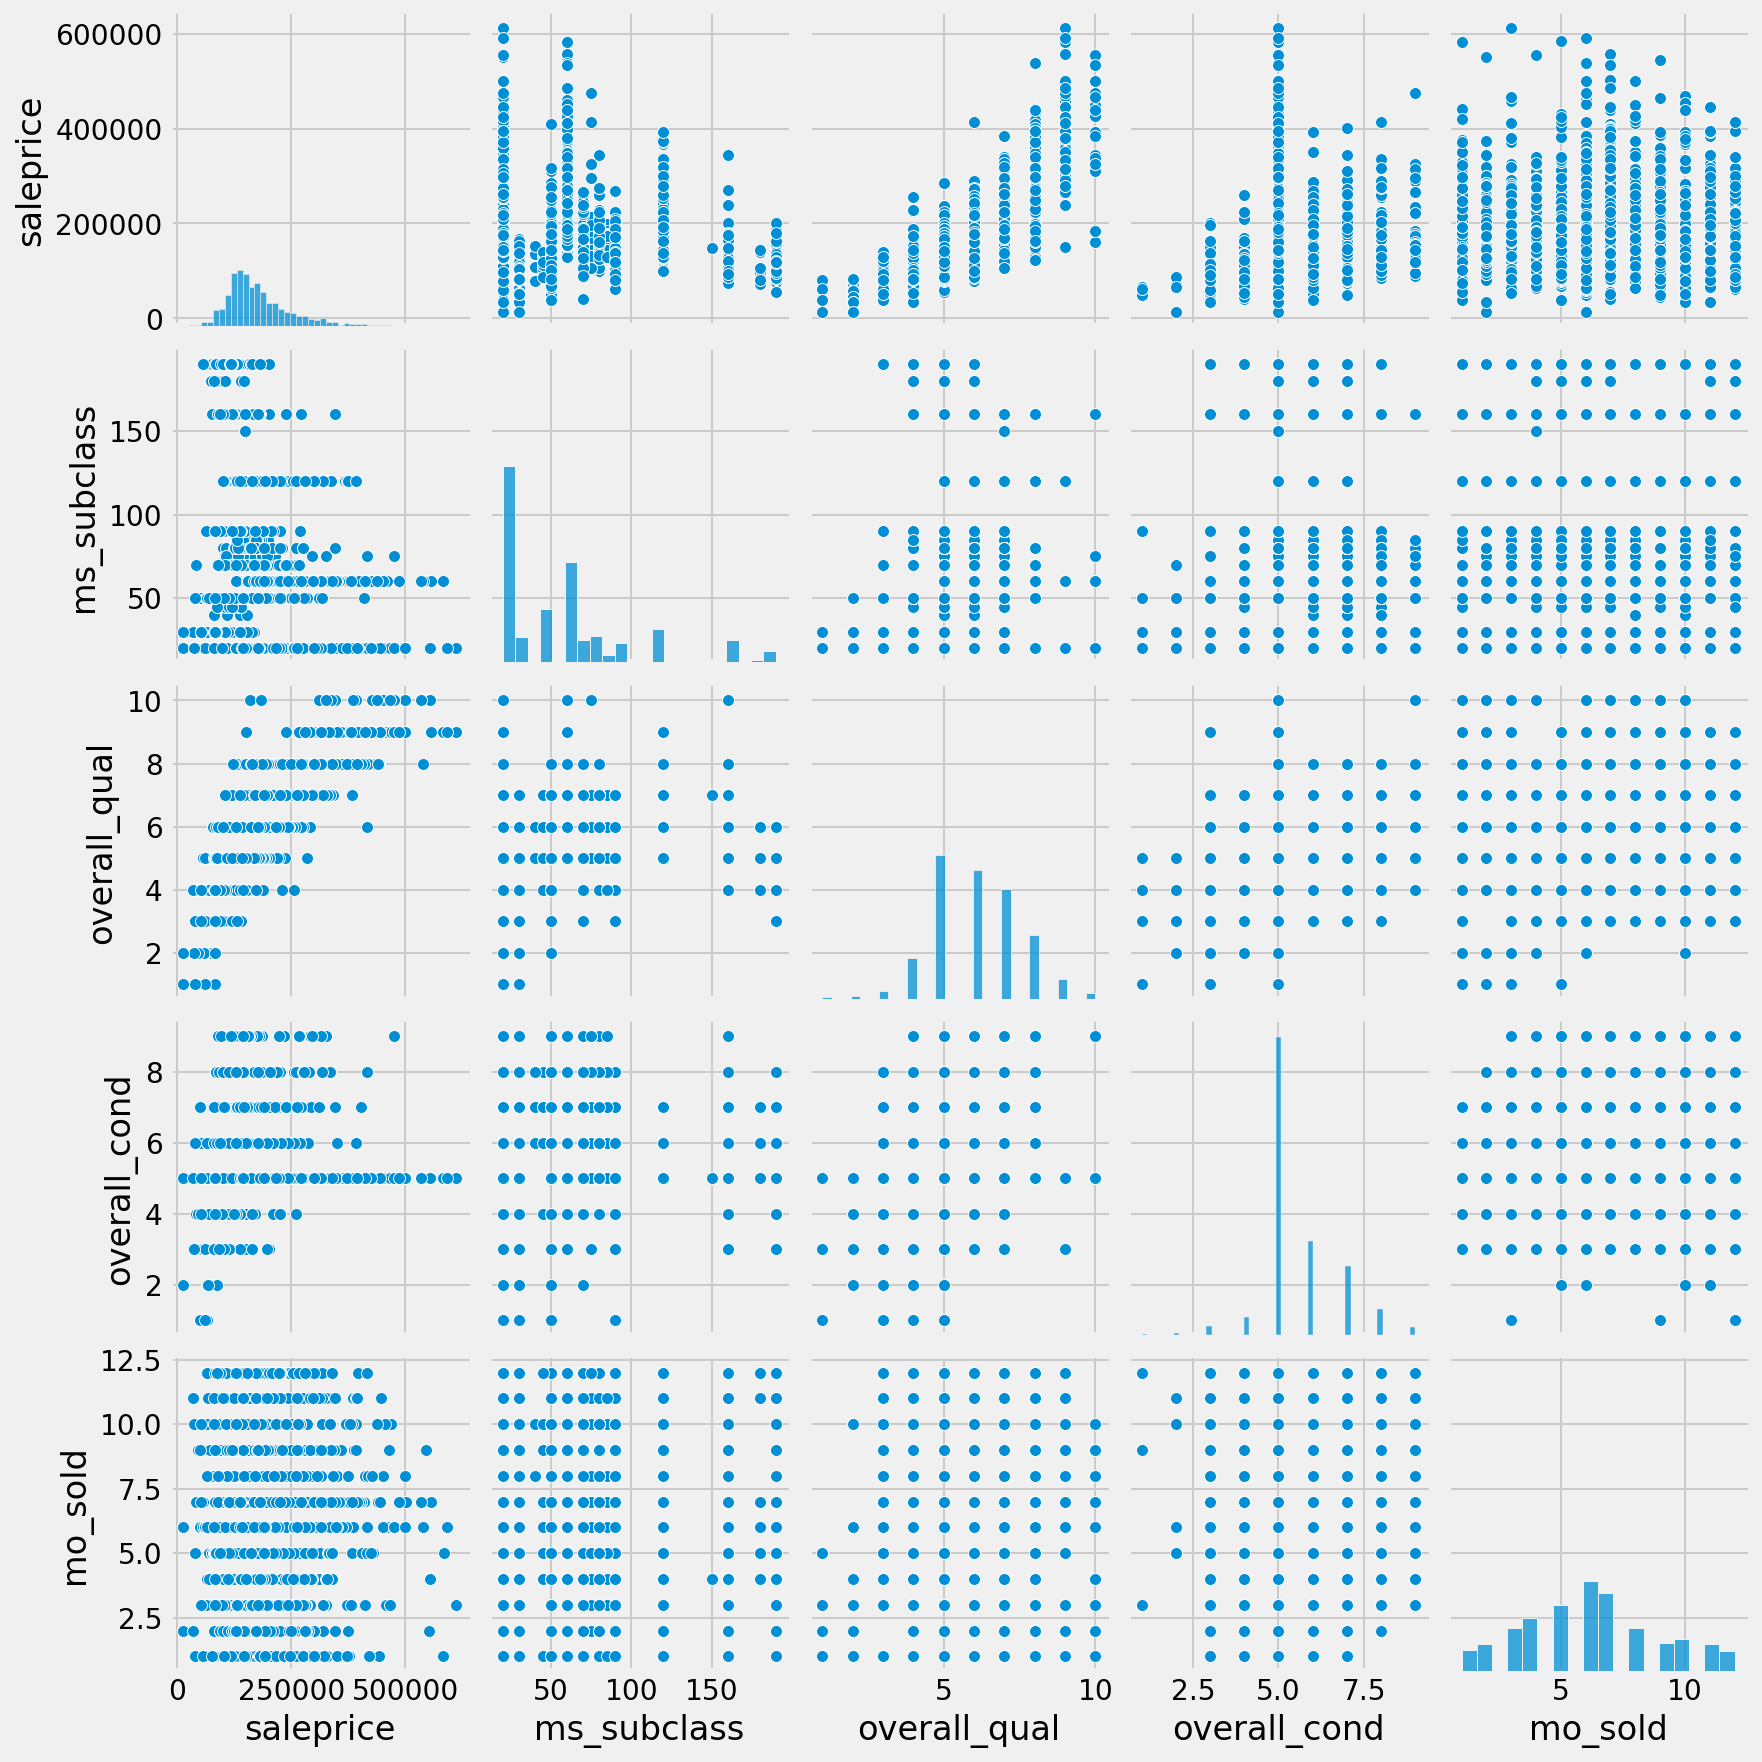

In [122]:
# Now for some initial Exploratory Data Analysis. Here we are looking to visually inspect our variables for insights 
# that may not be readily apparent.

sns.pairplot(ames_numeric_catagory) #initial eda on numeric features
plt.show()

After this initial visual inspection, we see that summer months have more sales, that sales price (our target) 
 has an obvious skew, and that more houses have an average overall condition than any other.

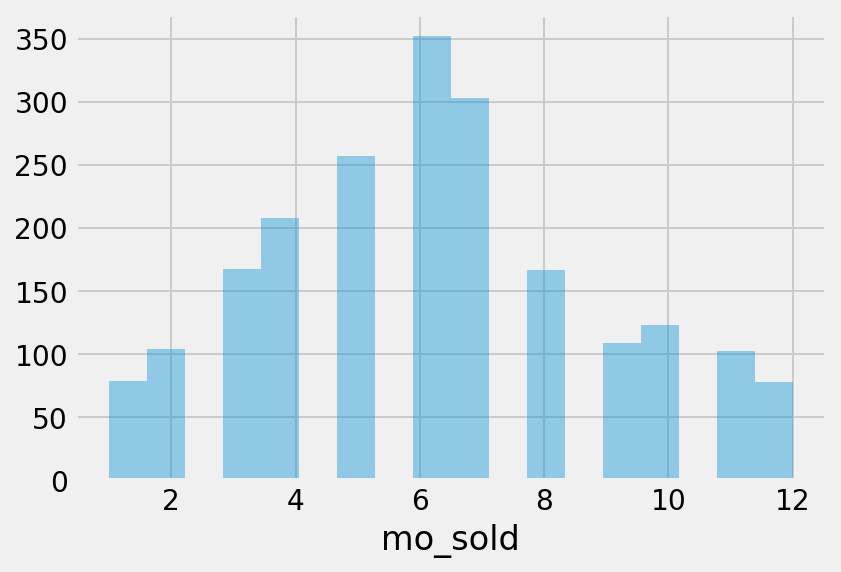

In [134]:
sns.distplot(ames_numeric_catagory['mo_sold'], kde=False)
plt.show()

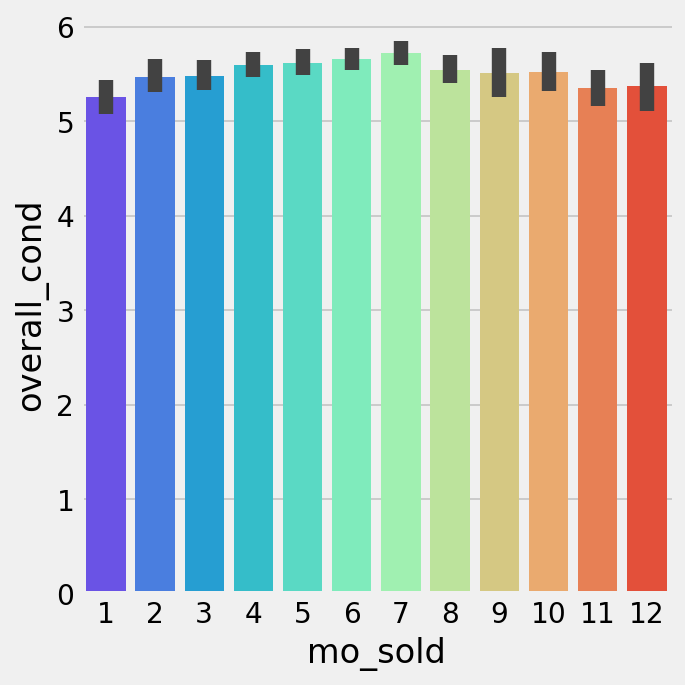

In [162]:
sns.catplot(x="mo_sold", y="overall_cond", kind = 'bar', data=ames_numeric_catagory, palette = "rainbow")
plt.show()

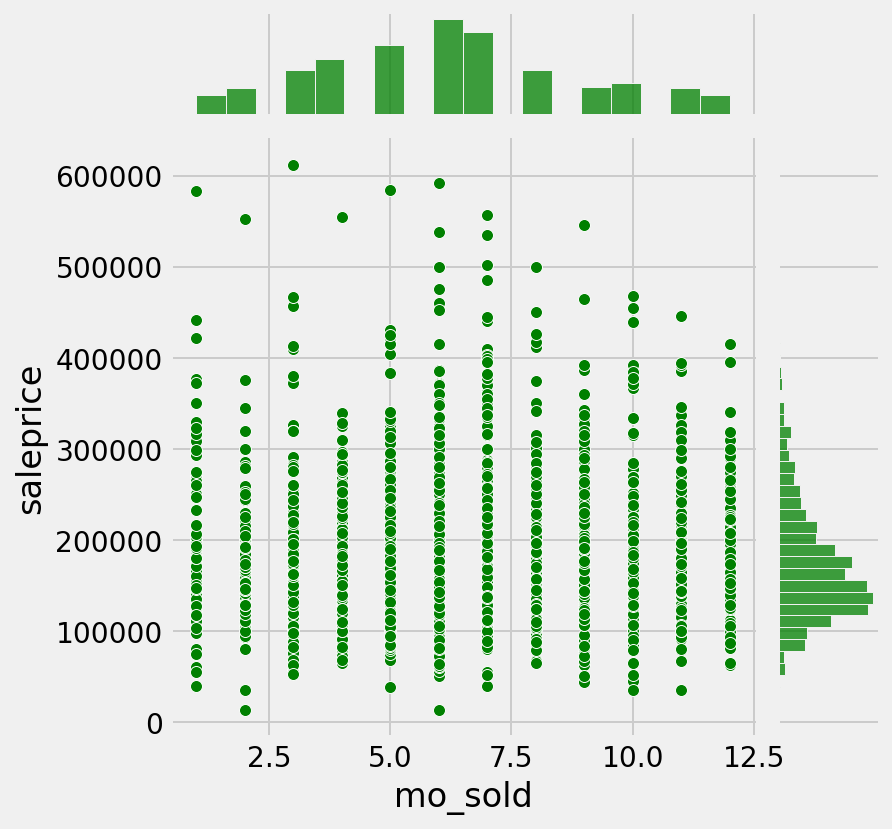

In [176]:
sns.jointplot(x="mo_sold", y="saleprice", data=ames_numeric_catagory, color ='green')
plt.show()

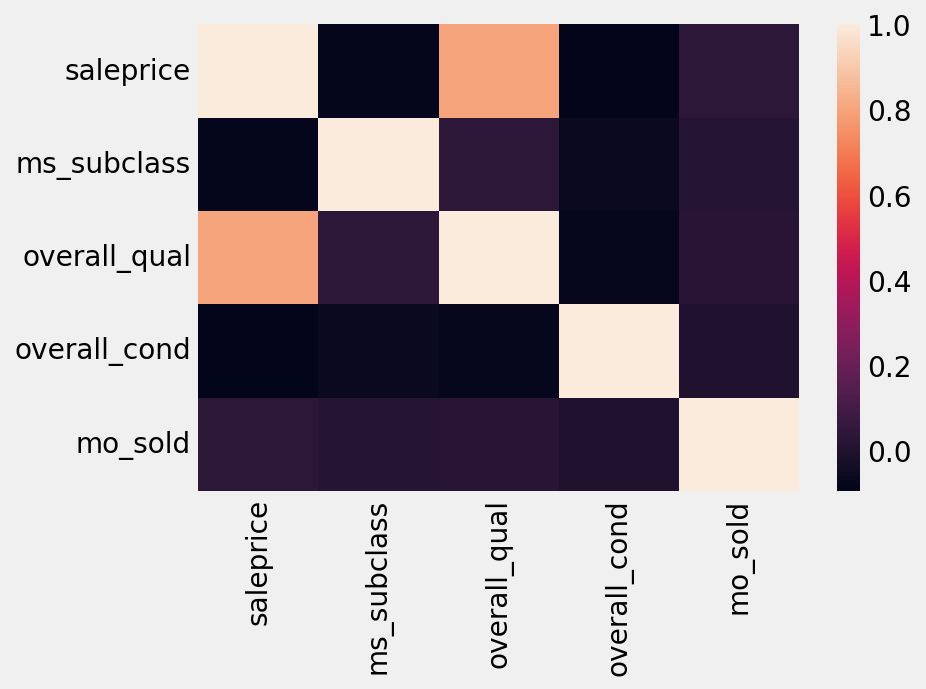

In [152]:
sns.heatmap(ames_numeric_catagory.corr(), fmt = ".2f")
plt.show()

# Ordinal catagory analysis

Let’s transform our ordinal feature columns into numbers so we can take a look at the correlations of these features as well.

In [153]:
# #ordinal columns

ames_ordinal.head()

,saleprice,lot_shape,utilities,land_slope,overall_qual,overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence
0,130500,IR1,AllPub,Gtl,6,8,Gd,TA,TA,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,NA,RFn,TA,TA,Y,NA,NA
1,220000,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,Ex,SBrkr,Gd,Typ,TA,RFn,TA,TA,Y,NA,NA
2,109000,Reg,AllPub,Gtl,5,7,TA,Gd,TA,TA,No,GLQ,Unf,TA,SBrkr,Gd,Typ,NA,Unf,TA,TA,Y,NA,NA
3,174000,Reg,AllPub,Gtl,5,5,TA,TA,Gd,TA,No,Unf,Unf,Gd,SBrkr,TA,Typ,NA,Fin,TA,TA,Y,NA,NA
4,138500,IR1,AllPub,Gtl,6,8,TA,TA,Fa,Gd,No,Unf,Unf,TA,SBrkr,TA,Typ,NA,Unf,TA,TA,N,NA,NA


In [163]:
# Ordinal data. Will want to convert these to ordinal lists.

# Columns I want to replace values in

ames_ordinal_str_columns = ames[['lot_shape',
                                 'utilities',
                                 'land_slope',
                                 'exter_qual',
                                 'exter_cond',
                                 'bsmt_qual',
                                 'bsmt_cond', 
                                 'bsmt_exposure', 
                                 'bsmtfin_type_1',
                                 'bsmtfin_type_2',
                                 'heating_qc',
                                 'electrical',
                                 'kitchen_qual',
                                 'functional',
                                 'fireplace_qu',
                                 'garage_finish',
                                 'garage_qual',
                                 'garage_cond',
                                 'paved_drive',
                                 'pool_qc',
                                 'fence'
                                ]]

# Dictionary of values I want to replace

dict_ordinal = {
    #overall_qual, overall_cond,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,heatingqc,kitchenqual
    #firplacequ,garage_qual,garage_cond,pool_qc,fence
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
    'NA': 0,
     #lot_shape
    'Reg':4,
    'IR1':3,
    'IR2':2,
    'IR3':1,
    #utilities
    'AllPub':4,
    'NoSewr':3,
    'NoSeWa':2,
    'ELO':1,
    #land_slope
    'Gtl':3,
    'Mod':2,
    'Sev':1,
    #bsmt_exposure
    'Av': 3,
    'Mn': 2,
    'No': 1,
    #bsmtfin_type_1, bsmtfin_type_1
    'GLQ':6,
    'ALQ':5,
    'BLQ':4,
    'Rec':3,
    'LwQ':2,
    'Unf':1,
    #Electrical
    'SBrkr':1,
    'FuseA':0,
    'FuseF':0,
    'FuseP':0,
    'Mix':0,
    #Functional
    'Typ':1,
    'Min1':0,
    'Min2':0,
    'Mod':0,
    'Maj1':0,
    'Maj2':0,
    'Sev':0,
    'Sal':0,
    #garage_finish    
    'Fin': 3,
    'RFn': 2,
    'Unf':1,
    #paved_drive
    'Y' : 2,
    'P' : 1,
    'N' : 0,
    #fence
    'GdPrv':4,
    'MnPrv':3,
    'GdWo':2,
    'MnWw':1   
}

for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [164]:
# These feature columns should all be numeric now

# visually inspect that the change took

ames[['lot_shape',
      'utilities',
      'land_slope',
      'exter_qual', 
      'exter_cond',
      'bsmt_qual',
      'bsmt_cond', 
      'bsmt_exposure', 
      'bsmtfin_type_1',
      'bsmtfin_type_2',
      'heating_qc',
      'electrical',
      'kitchen_qual',
      'functional',
      'fireplace_qu',
      'garage_finish',
      'garage_qual',
      'garage_cond',
      'paved_drive',
      'pool_qc',
      'fence'
     ]].head()

,lot_shape,utilities,land_slope,exter_qual,exter_cond,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_type_2,heating_qc,electrical,kitchen_qual,functional,fireplace_qu,garage_finish,garage_qual,garage_cond,paved_drive,pool_qc,fence
0,3,4,3,4,3,3,3,1,6,1,5,1,4,1,0,2,3,3,2,0,0
1,3,4,3,4,3,4,3,1,6,1,5,1,4,1,3,2,3,3,2,0,0
2,4,4,3,3,4,3,3,1,6,1,3,1,4,1,0,1,3,3,2,0,0
3,4,4,3,3,3,4,3,1,1,1,4,1,3,1,0,3,3,3,2,0,0
4,3,4,3,3,3,2,4,1,1,1,3,1,3,1,0,1,3,3,0,0,0


In [165]:
# Visually inspect the datatypes, all return as int64

#checking to see if all dtypes now numeric

ames[['lot_shape',
      'utilities',
      'land_slope',
      'exter_qual', 
      'exter_cond',
      'bsmt_qual',
      'bsmt_cond', 
      'bsmt_exposure', 
      'bsmtfin_type_1',
      'bsmtfin_type_2',
      'heating_qc',
      'electrical',
      'kitchen_qual',
      'functional',
      'fireplace_qu',
      'garage_finish',
      'garage_qual',
      'garage_cond',
      'paved_drive',
      'pool_qc',
      'fence'
     ]].dtypes

lot_shape         int64
utilities         int64
land_slope        int64
exter_qual        int64
exter_cond        int64
bsmt_qual         int64
bsmt_cond         int64
bsmt_exposure     int64
bsmtfin_type_1    int64
bsmtfin_type_2    int64
heating_qc        int64
electrical        int64
kitchen_qual      int64
functional        int64
fireplace_qu      int64
garage_finish     int64
garage_qual       int64
garage_cond       int64
paved_drive       int64
pool_qc           int64
fence             int64
dtype: object

# Neighborhood feature

In [166]:
# Now let’s do the same for the neighborhood feature. Intuitively this will be an important feature. 
# Location matters when it comes to housing prices.

ames['neighborhood_order'] = ames['neighborhood']

ames_ordinal_str_columns = ames[['neighborhood_order']]

dict_ordinal = {'MeadowV': 1,
                'IDOTRR' : 1,
                'BrDale' : 1,
                'OldTown': 1,
                'BrkSide': 1,
                'Edwards': 1,
                'SWISU': 1,
                'Landmrk':2,
                'Sawyer':2,
                'NPkVill':2,
                'Blueste':2,
                'NAmes':2,
                'Mitchel':2,
                'SawyerW':2,
                'Greens':3,
                'Gilbert':3,
                'NWAmes':3,
                'Blmngtn':3,
                'CollgCr':3,
                'Crawfor':3,
                'ClearCr':3,
                'Somerst':4,
                'Timber':4,
                'Veenker':4,
                'GrnHill':4,
                'StoneBr':4,
                'NoRidge':4,
                'NridgHt':4,
               }

for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

# This is a part of feature engineering and the portion of data science

Note that I decided to split this into four separate bins, instead of a unique bin for all neighborhoods. 

In [167]:
ames.groupby('neighborhood_order')['saleprice'].agg(['mean','count'])

,mean,count
neighborhood_order,,
1,122418.882129,526
2,152986.122150,614
3,199206.035573,506
4,279185.908642,405


In [170]:
ames['neighborhood'].nunique() # there are 28 unique neighborhoods

28

In [171]:
location_price = ames.groupby('neighborhood')['saleprice'].mean().sort_values()

location_price

neighborhood
MeadowV    100231.250000
IDOTRR     101103.188406
BrDale     103371.052632
OldTown    125276.300613
BrkSide    127022.697368
Edwards    130493.468531
SWISU      134758.875000
Landmrk    137000.000000
Sawyer     137181.909910
NPkVill    140476.470588
Blueste    144566.666667
NAmes      145905.816129
Mitchel    167656.707317
SawyerW    187760.160920
Greens     188666.666667
Gilbert    189228.387931
NWAmes     194619.022989
Blmngtn    200417.681818
CollgCr    202497.216667
Crawfor    205901.211268
ClearCr    217490.074074
Somerst    227183.900000
Timber     241051.354167
Veenker    253570.588235
GrnHill    280000.000000
NoRidge    316294.125000
NridgHt    322831.352459
StoneBr    329675.736842
Name: saleprice, dtype: float64

In [172]:
ames['saleprice'].describe()

count      2051.000000
mean     181469.701609
std       79258.659352
min       12789.000000
25%      129825.000000
50%      162500.000000
75%      214000.000000
max      611657.000000
Name: saleprice, dtype: float64

### Some neighborhoods have a much higher price tag associated with their houses. 

- There is a fairly large deviation in the sales price of approximately 80,000 (std=79258.659352) one standard deviation from the mean. These summary stats also suggest that there are outliers on the high end of the distribution as the 75th percentile is ~$400,000 less than the max sale price (75%=214000.000000, max=611657.000000)

- Regression algorithms tend to be sensitive to non-normally distributed target variables 
so this is something that I expect to have to address before creating a modeling dataset

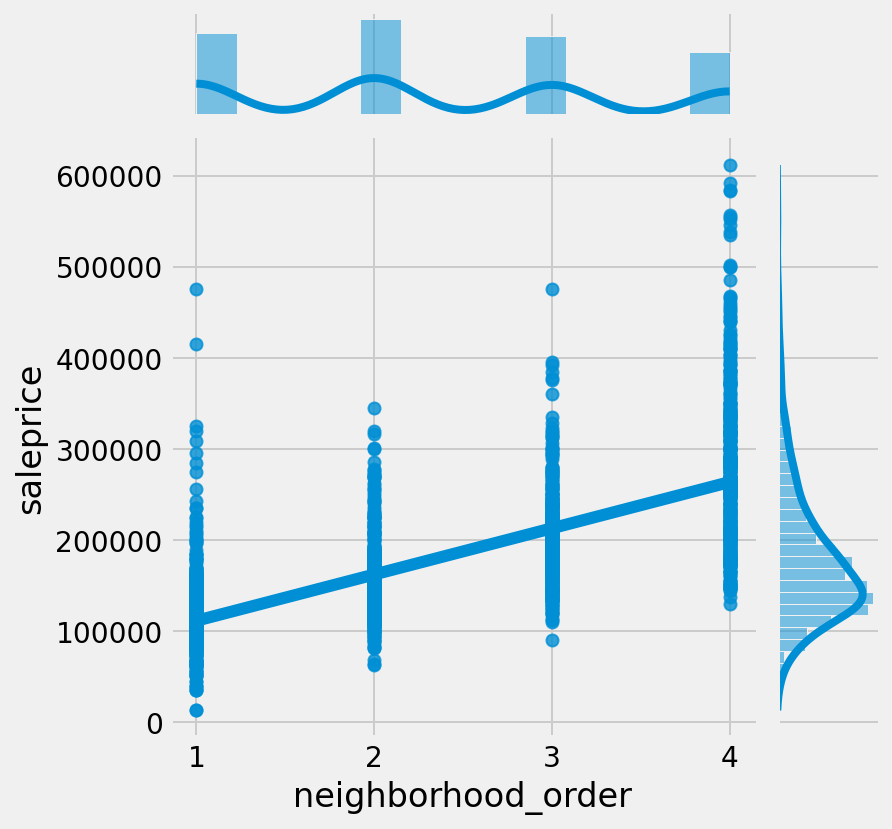

In [173]:
# pairplot

sns.jointplot(x=ames['neighborhood_order'],y=ames['saleprice'],kind="reg")
plt.show()

There is a linear relationship between ordered neighborhood by price and saleprice. 
Also aprox. equal distribution items in each bin. This feature is a valuable one in the model

In [178]:
ames.groupby('condition_1')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') # location matters!

,mean,count
condition_1,,
Artery,128765.000000,70
RRNe,129616.666667,3
RRAe,139685.714286,21
Feedr,143223.605505,109
RRAn,172604.777778,36
Norm,185007.310130,1767
RRNn,198208.333333,6
PosA,254733.333333,12
PosN,254794.296296,27


The location has a strong positive relationship with the house sale price, 
let’s examine other location and external features that may also have strong relationships. 
Here is the proximity of a building from positive or negative features such as greenbelts and parks (positive) 
or railways and busy roads (negative)

# House conditions

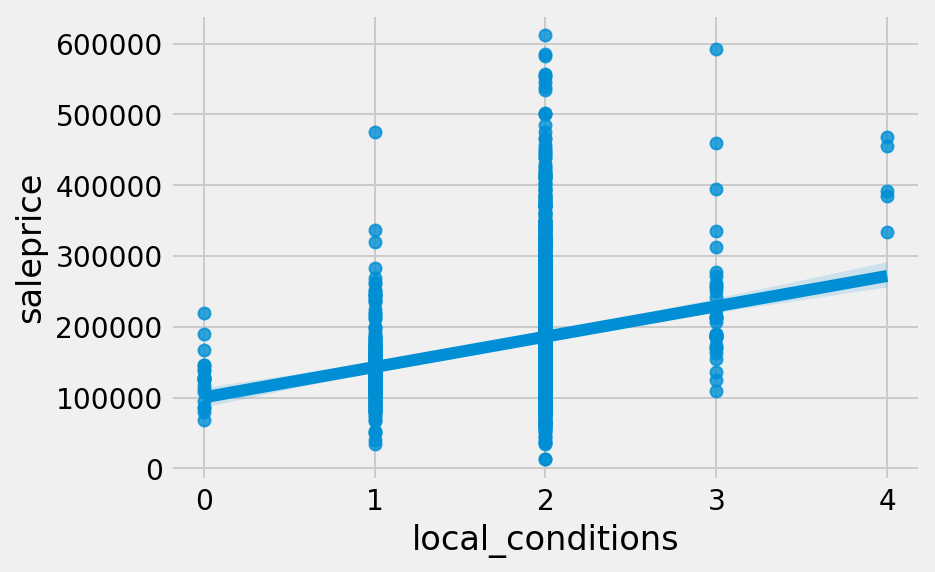

In [179]:
# The dataset measures up to two local conditions. Let’s combine condition one and two into a single feature 
# that is a measure of all documented local features in the dataset

# If by positive feature, 1 if normal, 0 if negative feature

ames['positive_condition1'] = ames['condition_1']
ames['positive_condition2'] = ames['condition_2']

ames_ordinal_str_columns = ames[['positive_condition2', 'positive_condition1']]

dict_ordinal = {'Artery':0,
                'RRNe':0,
                'RRAe':0,
                'Feedr':0,
                'RRAn':0,
                'Norm':1,
                'RRNn':0,
                'PosN':2,
                'PosA':2,
               }

for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)
    
# This a combined measure of local features. Railroads and busy streets are just not quite as nice
# to live by as are greenbelts and parks and even normal places

ames['local_conditions'] = ames['positive_condition1'] + ames['positive_condition2'] 

sns.regplot(x=ames['local_conditions'],y=ames['saleprice'])
plt.show()

# Sale types

In [182]:
ames.sale_type.unique()

array(['WD ', 'New', 'COD', 'ConLD', 'Con', 'CWD', 'Oth', 'ConLI',
       'ConLw'], dtype=object)

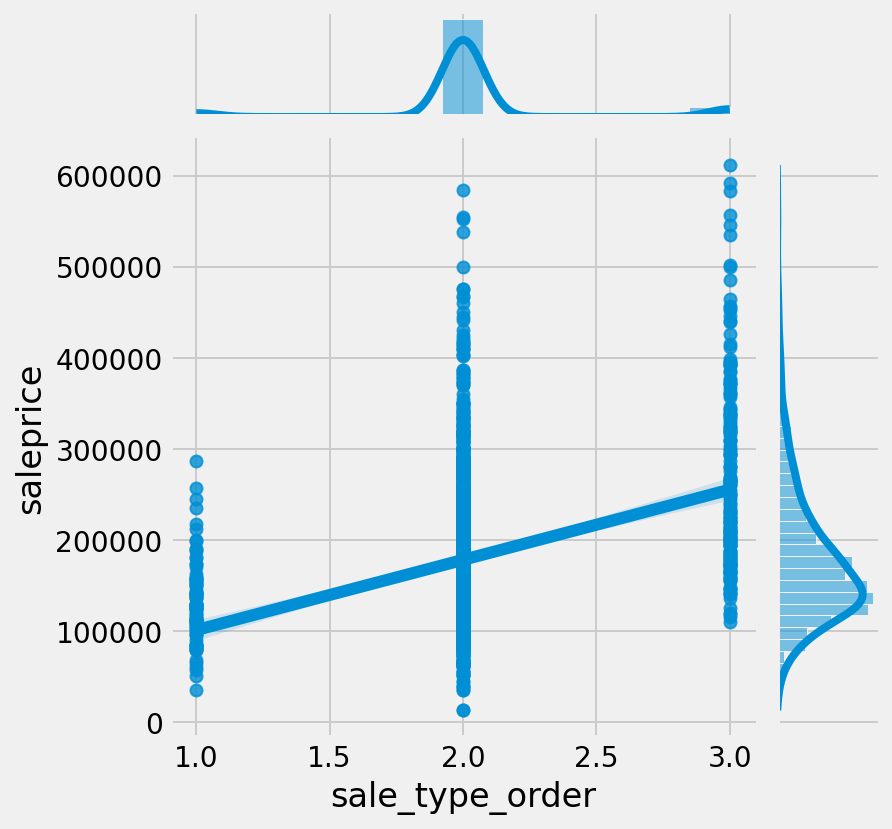

In [183]:
# How does the type of sale interact with the total sale price?
# Sale Type ordered by price

ames['sale_type_order'] = ames['sale_type']
ames_ordinal_str_columns = ames[['sale_type_order']]

dict_ordinal = {'ConLw':1,
                'Oth':1,
                'ConLD':1,
                'COD':1,
                'VWD':2,
                'WD ':2,
                'CWD':3,
                'ConLI':3,
                'Con':3,
                'New':3
               }

for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

sns.jointplot(x=ames['sale_type_order'],y=ames['saleprice'],kind='reg')
plt.show()

In [184]:
ames.groupby('sale_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') # New and higher downpayment cost more

,mean,count
sale_type,,
ConLw,124600.000000,5
Oth,127497.750000,4
ConLD,129091.352941,17
COD,133574.523810,63
WD,174912.251544,1781
CWD,186635.000000,10
ConLI,207992.857143,7
Con,241807.500000,4
New,279021.056250,160


The above tells us that certain types of payment have an impact on house sale price over other types. 
Notably, that new loans and higher downpayment homes cost more. This makes intuitive sense as more expensive houses 
will have a higher dollar amount associated with the same percentage downpayment when compared to cheaper houses

# Lot frontage and sale price

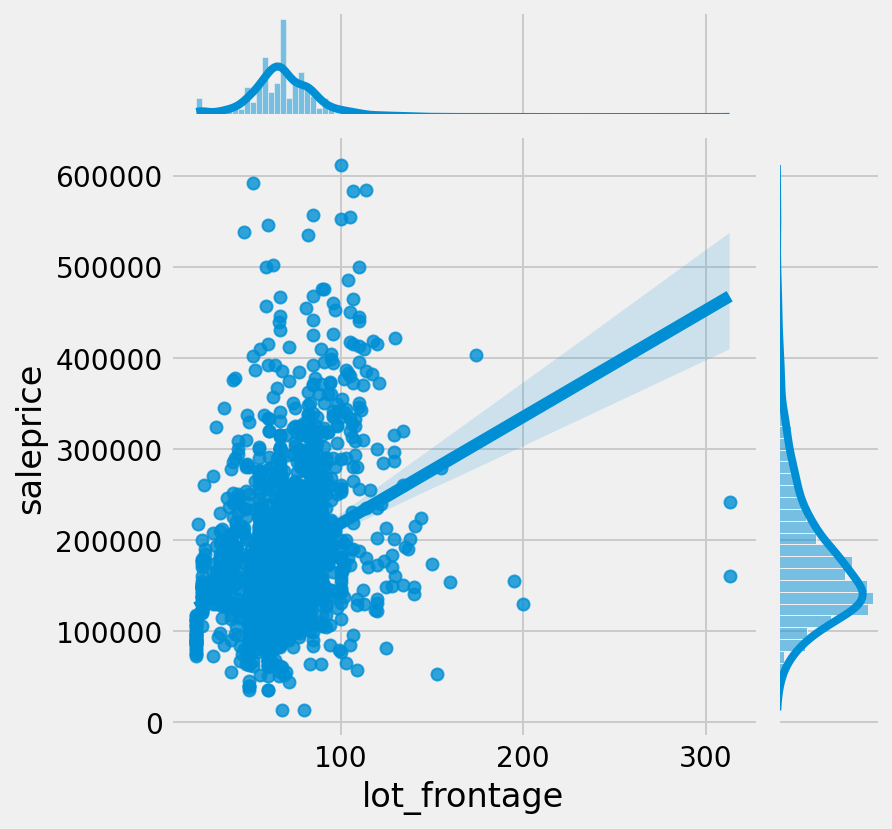

In [185]:
# lot_frontage and saleprice have a linear r-ship

sns.jointplot(x=ames['lot_frontage'],y=ames['saleprice'],kind='reg')
plt.show()

This plot identifies both a strong relationship between lot_frontage and house sales price and visually identifies some clear outliers

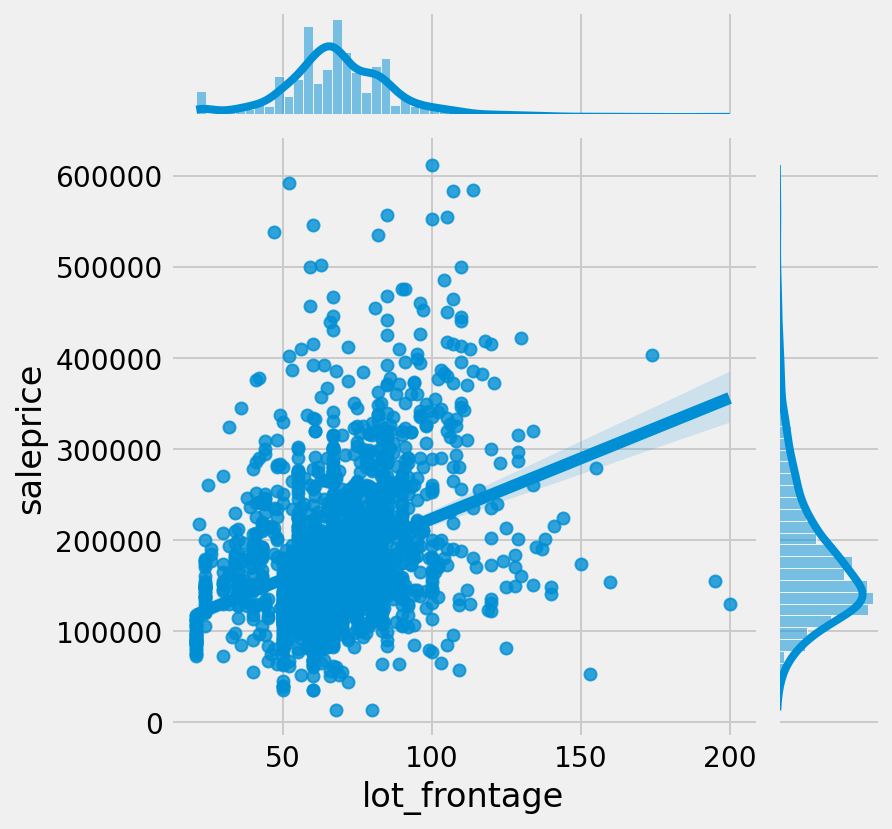

In [186]:
# What does this regplot look like with those outliers removed

x_frontage = ames[ames['lot_frontage'] < 313]

#r-ship without outliers look significantly more linear
sns.jointplot(x=x_frontage['lot_frontage'],y=x_frontage['saleprice'],kind='reg'); 
plt.show()

In [187]:
x_frontage = ames[ames['lot_frontage'] > 250] # Outliers to drop
x_frontage

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_order,positive_condition1,positive_condition2,local_conditions,sale_type_order
960,1499,908154235,60,RL,313.0,63887,Pave,NA,1,Bnk,4,Corner,3,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,Y,1,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,1,3,4,Attchd,2008.0,3,2.0,1418.0,3,3,2,214,292,0,0,0,480,4,0,NA,0,1,2008,New,160000,1,0,1,1,3
1335,1266,535427070,20,RL,313.0,27650,Pave,NA,2,HLS,4,Inside,0,NAmes,PosA,Norm,1Fam,1Story,7,7,1960,2007,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,4,3,4,6,425.0,1,0.0,160.0,585.0,GasA,5,Y,1,2069,0,0,2069,1.0,0.0,2,0,4,1,4,9,1,1,4,Attchd,1960.0,2,2.0,505.0,3,3,2,0,0,0,0,0,0,0,0,NA,0,11,2008,WD,242000,2,2,1,3,2


The linear relationship between house price and lot frontage is greatly improved when these outliers are removed. 
It is worth dropping these two outliers to improve overall model performance

# Year remodeled and the year house built

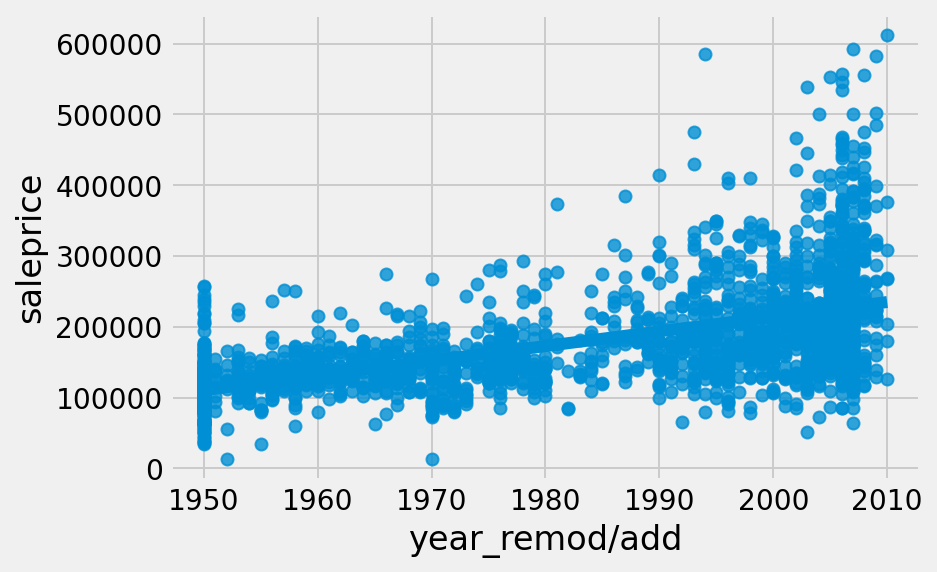

In [188]:
# Now for a look at the year remodeled and the year house built

sns.regplot(x=ames['year_remod/add'],y=ames['saleprice'])
plt.show()

There is a linear relationship here between year remodeled and saleprice. This is a dummy feature. 
Seems like there are way more remodels in the 2000’s than before.

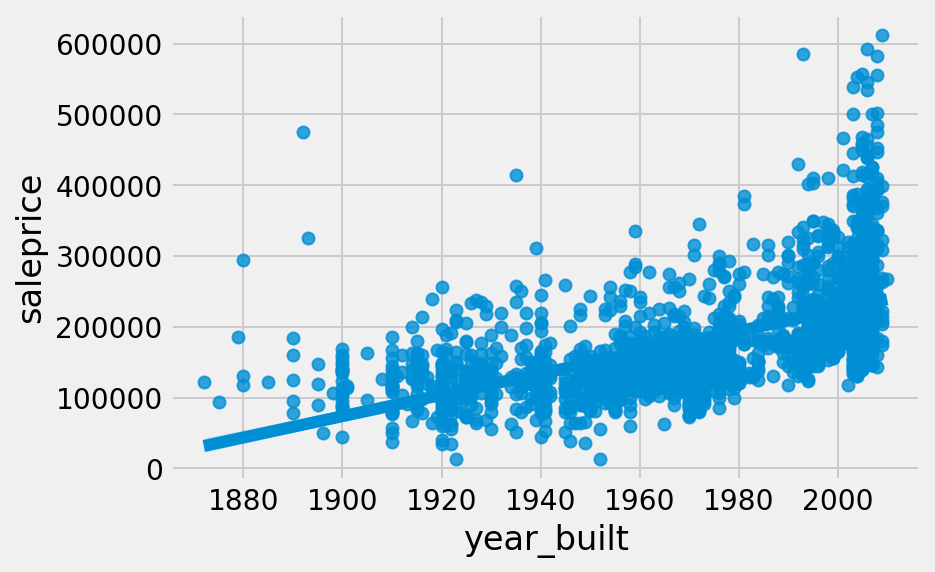

In [189]:
sns.regplot(x=ames['year_built'],y=ames['saleprice'])
plt.show()

Same for year that a house was built. I will make a column ‘age’ for age of house at time of sale to represent this relationship

# Basement features

A look at basement features, an overall score of basement quality in ceiling height and access to outside.
Here we engineer a variable that looks at the interaction between basement quality and basement square footage. 
This is to create a feature for the Home Buyers that can measure the amount of finished basement space there is in a house


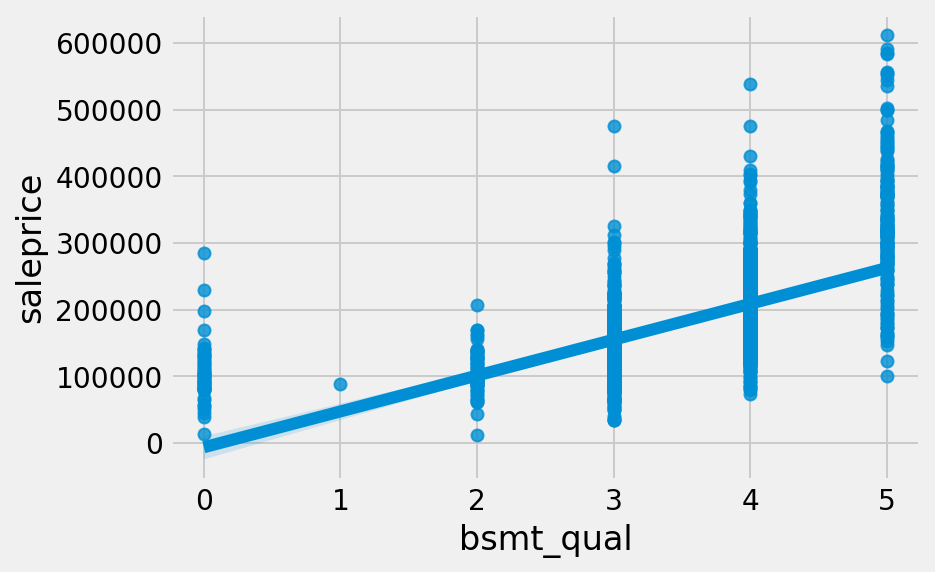

In [191]:
ames['basement_overall'] = ames['bsmt_qual'] * ames['bsmt_exposure']

sns.regplot(x=ames['bsmt_qual'],y=ames['saleprice'])
plt.show()

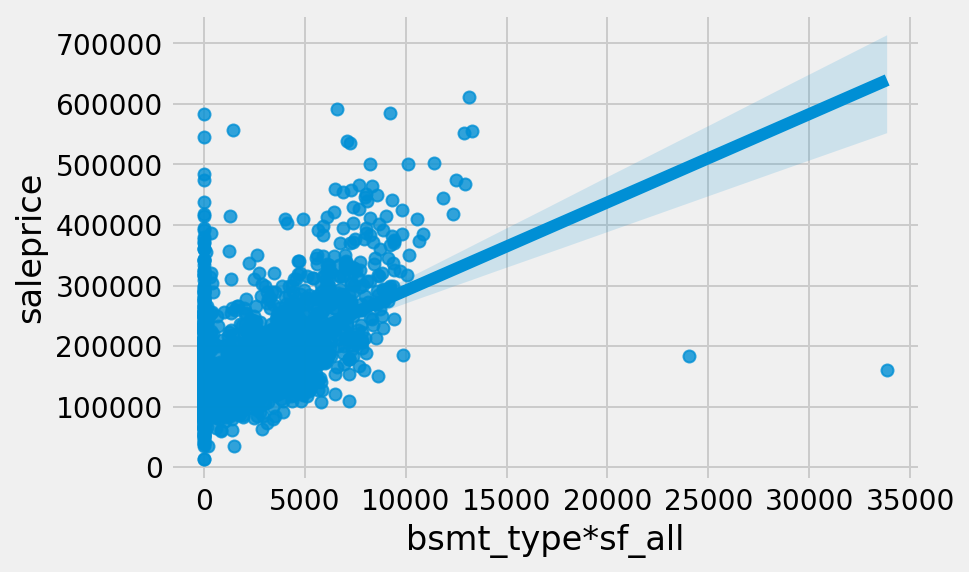

In [192]:
# quality*sf interaction variable. Clear outliers
ames['bsmt_type*sf_all'] = (ames['bsmtfin_type_1'] * ames['bsmtfin_sf_1']) + (ames['bsmtfin_type_2'] * ames['bsmtfin_sf_2']) 

sns.regplot(x=ames['bsmt_type*sf_all'],y=ames['saleprice'])
plt.show()

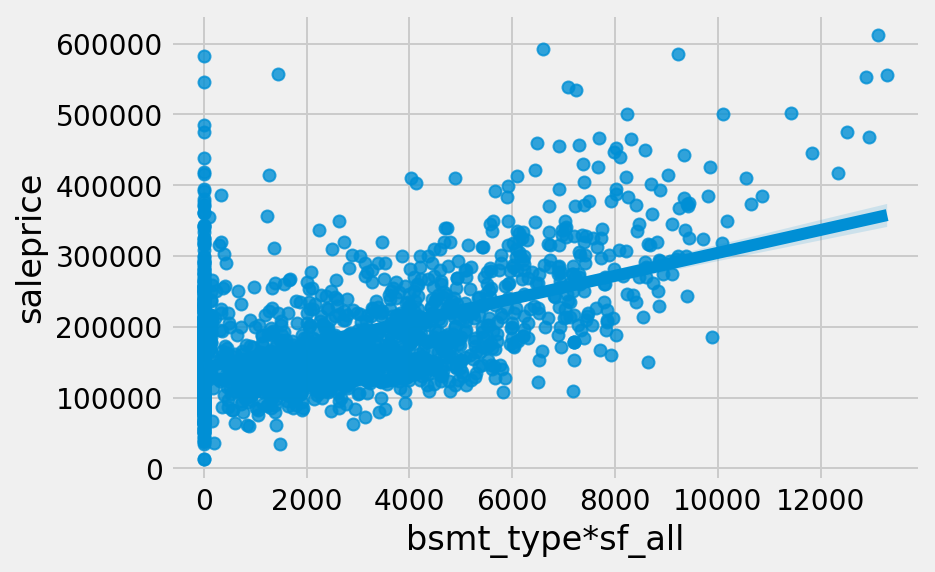

In [193]:
# What does this our finished basement space plot look like with the outliers removed

# quality*sf interaction variable
ames['bsmt_type*sf_all'] = (ames['bsmtfin_type_1'] * ames['bsmtfin_sf_1']) + (ames['bsmtfin_type_2']*ames['bsmtfin_sf_2']) 

bsmt_no_outliers = ames[ames['bsmt_type*sf_all'] < 20000]

sns.regplot(x=bsmt_no_outliers['bsmt_type*sf_all'],y=bsmt_no_outliers['saleprice'])
plt.show()

# looks really nice with those outliers masked

In [194]:
ames[ames['bsmt_type*sf_all'] > 20000] # outliers to drop

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,alley,lot_shape,land_contour,utilities,lot_config,land_slope,neighborhood,condition_1,condition_2,bldg_type,house_style,overall_qual,overall_cond,year_built,year_remod/add,roof_style,roof_matl,exterior_1st,exterior_2nd,mas_vnr_type,mas_vnr_area,exter_qual,exter_cond,foundation,bsmt_qual,bsmt_cond,bsmt_exposure,bsmtfin_type_1,bsmtfin_sf_1,bsmtfin_type_2,bsmtfin_sf_2,bsmt_unf_sf,total_bsmt_sf,heating,heating_qc,central_air,electrical,1st_flr_sf,2nd_flr_sf,low_qual_fin_sf,gr_liv_area,bsmt_full_bath,bsmt_half_bath,full_bath,half_bath,bedroom_abvgr,kitchen_abvgr,kitchen_qual,totrms_abvgrd,functional,fireplaces,fireplace_qu,garage_type,garage_yr_blt,garage_finish,garage_cars,garage_area,garage_qual,garage_cond,paved_drive,wood_deck_sf,open_porch_sf,enclosed_porch,3ssn_porch,screen_porch,pool_area,pool_qc,fence,misc_feature,misc_val,mo_sold,yr_sold,sale_type,saleprice,neighborhood_order,positive_condition1,positive_condition2,local_conditions,sale_type_order,basement_overall,bsmt_type*sf_all
960,1499,908154235,60,RL,313.0,63887,Pave,NA,1,Bnk,4,Corner,3,Edwards,Feedr,Norm,1Fam,2Story,10,5,2008,2008,Hip,ClyTile,Stucco,Stucco,Stone,796.0,5,3,PConc,5,3,4,6,5644.0,1,0.0,466.0,6110.0,GasA,5,Y,1,4692,950,0,5642,2.0,0.0,2,1,3,1,5,12,1,3,4,Attchd,2008.0,3,2.0,1418.0,3,3,2,214,292,0,0,0,480,4,0,NA,0,1,2008,New,160000,1,0,1,1,3,20,33864.0
1885,2181,908154195,20,RL,128.0,39290,Pave,NA,3,Bnk,4,Inside,3,Edwards,Norm,Norm,1Fam,1Story,10,5,2008,2009,Hip,CompShg,CemntBd,CmentBd,Stone,1224.0,5,3,PConc,5,3,4,6,4010.0,1,0.0,1085.0,5095.0,GasA,5,Y,1,5095,0,0,5095,1.0,1.0,2,1,2,1,5,15,1,2,4,Attchd,2008.0,3,3.0,1154.0,3,3,2,546,484,0,0,0,0,0,0,Elev,17000,10,2007,New,183850,1,1,1,2,3,20,24060.0


Note: This is the second time we’ve seen house ID 1499 as a clear outlier. 
The first time was with the lot frontage feature. Further confirmation on the instinct to drop this row

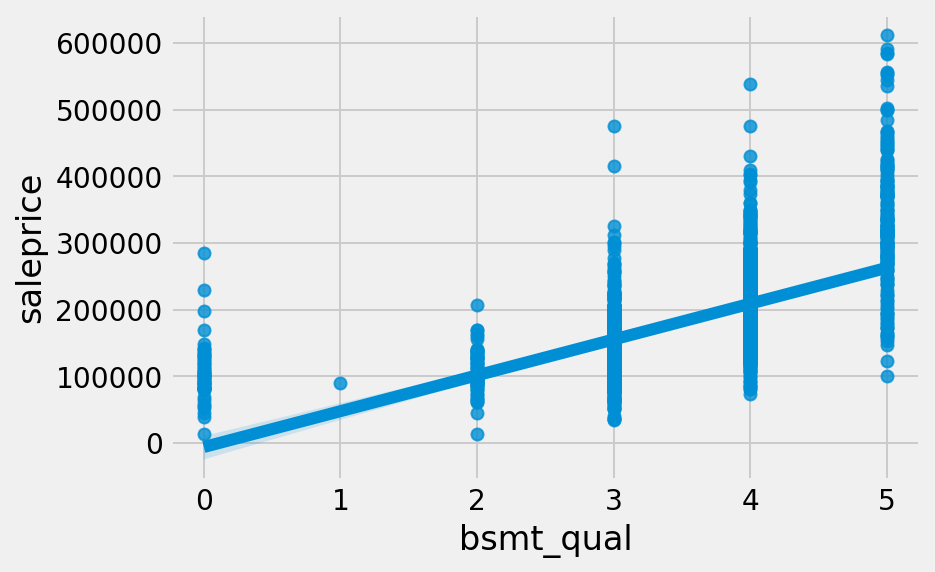

In [195]:
# Now for basement ceiling height

sns.regplot(x=ames['bsmt_qual'],y=ames['saleprice']); # basement ceiling height is has a linear r-ship with saleprice
plt.show()

In [ ]:
# Let’s create a feature similar to our finished basement space interaction that measures the interaction between 
# the quality of garage finish by garage area. This is the feature or craft cave feature
# For the sake of the regression model, it also reduces feature dimensionality and has a linear relationship with 
# the sales price.

# This is the man cave feature. I want a finished garage that is massive. A garage with a lot of space for crafting.
ames['garage_fin*sqft'] = ames['garage_area'] * ames['garage_finish'] 

sns.regplot(x=ames['garage_fin*sqft'],y=ames['saleprice'])
plt.show()

In [ ]:
# Let’s hop back inside the house and examine the kitchen, a feature that ends up being very important for the model

sns.regplot(x=ames['kitchen_qual'],y=ames['saleprice']) # This is a model variable. It is a great feature for the model.
plt.show()

In [ ]:
# fireplace quality is another great feature for the model. It can tell me if a house has a fireplace and the quality 
# of that fireplace. The fireplace number feature tells me less as there is a diminishing marginal return every 
# additional fireplace after the first fireplace has been installed.

sns.regplot(x=ames['fireplace_qu'],y=ames['saleprice']) 
plt.show()

In [ ]:
# This is a great feature. As living space increases sales price strongly increases.

sns.regplot(x=ames['gr_liv_area'],y=ames['saleprice']); 
plt.show()

In [ ]:
# Some more feature reduction without losing any of the frequency towards predicting house price by combining 
# upstairs house square feet and focusing on livable space over low quality finished space

# People are paying for quality space more than they are looking for low quality space. 
ames['quality_above_sqft'] = (ames['1st_flr_sf'] + ames['2nd_flr_sf']) - ames['low_qual_fin_sf'] 

# I’ll combine these three into one and make a variable that is better than gr_liv_area while reducing 4 features into one.
sns.regplot(x=ames['quality_above_sqft'],y=ames['saleprice']); 
plt.show()

In [ ]:
# beautiful. What's up with those outliers though?

ames[ames['1st_flr_sf'] > 4000] 

# Same ID’s as for basement and 1499 was outlier on frontage as well. These will be dropped.

In [ ]:
# Combine basment baths to reduce features and more accurately portray the bathroom story.

ames['bsmt_baths'] = ames['bsmt_full_bath'] + (ames['bsmt_half_bath']/2) 

sns.regplot(x=ames['bsmt_baths'],y=ames['saleprice'])
plt.show()

In [ ]:
# Combine upstairs baths

ames['above_baths'] = ames['full_bath'] + (ames['half_bath']/2) 

sns.regplot(x=ames['above_baths'],y=ames['saleprice'])
plt.show()

In [ ]:
# I like this all bath feature, more how I think about baths in a home.

ames['all_baths'] = ames['above_baths'] + ames['bsmt_baths'] 

sns.regplot(x=ames['all_baths'],y=ames['saleprice'])
plt.show()

In [ ]:
# Let's take a look at all_bathrooms outliers

ames[ames['all_baths'] == 7] # outliers

In [ ]:
# Was expecting a more linear r-ship here
# This does not appear to be as linear of a relationship I was expecting.

ames.groupby('bedroom_abvgr')['saleprice'].agg(['mean','count'])

In [ ]:
# This is a model feature

sns.regplot(x=ames['totrms_abvgrd'],y=ames['saleprice'])
plt.show()

In [ ]:
# Here we take a look at how the overall size of rooms in a house relates to the price of a house. 
# The hypothesis is that as average room size increases so does overall house price. 
# There are situations where a house has been partitioned into many smaller rooms for rental purposes, 
# particularly in college towns

# sqft per room w/o baths. This performs better than with baths. I want a measure of the size of the rooms in houses.
ames['room_size'] = ames['gr_liv_area'] / (ames['totrms_abvgrd']) 

sns.regplot(x=ames['room_size'],y=ames['saleprice'])
plt.show()

In [ ]:
# This is pretty linear
# This appears to be in line with the assumption made above. Larger rooms mean greater house price

ames.groupby('room_size')['saleprice'].agg(['mean']) 

In [ ]:
# Most every house has 1. Not worth including. Houses have kitchens or they are industrial spaces maybe?

ames['kitchen_abvgr'].value_counts() 

In [ ]:
# Now we begin to take a look at exterior home features. 
# Does additional grilling space outside of the house add to the value of the sale price?

sns.regplot(x=ames['wood_deck_sf'],y=ames['saleprice']); # looking at exterior features now

In [ ]:
# It appears that the more deck space and open porch space the higher the sale price of the house. 
# Note how the wood deck and open porch regplots look very similar

sns.regplot(x=ames['open_porch_sf'],y=ames['saleprice']); # very similar between porch types and deck type
plt.show()

In [ ]:
# These can be combined into one feature that acts as a measure of developed outside space.
# Combine different porches. Trying to measure developed outside space for houses. 

ames['developed_outside_sf'] = ames['open_porch_sf'] + ames['screen_porch'] + ames['enclosed_porch'] + ames['3ssn_porch'] + ames['wood_deck_sf']

sns.regplot(x=ames['developed_outside_sf'],y=ames['saleprice'])
plt.show()

In [ ]:
# We observed how the count of homes sold in the summer months is higher than the count of homes sold in colder months. 
# Does this affect house price though?
# While there are more houses sold in warmer months house prices don't vary much by month
# the month does not appear to have as strong an effect on the sale price as it does the number of homes sold.

ames.groupby('mo_sold')['saleprice'].agg(['mean', 'count']).sort_values(by = 'count')

In [ ]:
# Let’s take a look at roof material
# too uniform, will leave alone for now
# Most roofs are made from the same material. This may not be useful as a model variable

ames.groupby('roof_matl')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

In [ ]:
# How about outside masonry veneer type?

ames['mas_vnr_area']

sns.regplot(x=ames['mas_vnr_area'],y=ames['saleprice'])
plt.show()

In [ ]:
# Pretty good divide in price here. Going group and dummy it

ames['mas_vnr_type']

ames.groupby('mas_vnr_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

In [ ]:
# The type and square footage of masonry does appear to have a clear effect on house sale price. 
# Let’s convert this dtype=object to a numeric type so we can use it as a model variable.

ames['mas_vnr_type_dummy'] = ames['mas_vnr_type']
ames_ordinal_str_columns = ames[['mas_vnr_type_dummy']]

dict_ordinal = {'None':0,
                'BrkCmn':0,
                'CBlock':0,
                'BrkFace':1,
                'Stone':1,
               }

for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [ ]:
# How does the age of a house at the time of sale affect the sale price?
# newer homes tend to cost more than older homes

ames['age'] = ames['yr_sold'] - ames['year_built'] # Age of house at time of sale

sns.regplot(x=ames['age'],y=ames['saleprice'])
plt.show()

In [ ]:
# Let’s create a dummy variable for if a house was remodeled or not

ames['was_remodeled'] =  ames['year_remod/add'] - ames['year_built'] # dummy for if house was remodeled

ames['was_remodeled'] = [1 if i> 0 else 0 for i in ames['was_remodeled']]

In [ ]:
# How does the type of electrical set-up relate to house price?

ames.groupby('electrical')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

In [ ]:
sns.regplot(x=ames['electrical'],y=ames['saleprice'])
plt.show()

In [ ]:
# Now let’s take a look at the zone type and how it relates to house sale price.

ames.groupby('ms_zoning')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

In [ ]:
# I want to create a variable that takes into account if a sale is residential or not, 
# given that the scope of this project is mainly to measure the determinants of the residential house sale price

ames['is_residential'] = ames['ms_zoning'] # a dummy variable for if a house is residential or other (ag, industrial, corp)

ames_ordinal_str_columns = ames[['is_residential']]

dict_ordinal = {'A (agr)':0,
                'I (all)':0,
                'C (all)':0,
                'RM':1,
                'RH':1,
                'RL':1,
                'FV':1,
               }

for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

In [ ]:
# Now let’s look at additional external house features. These can be combined in the same way as many above.

# if by positive feature, 1 if normal, 0 if negative feature. 

ames['exterior_ordinal1'] = ames['exterior_1st']
ames['exterior_ordinal2'] = ames['exterior_2nd']

ames_ordinal_str_columns = ames[['exterior_ordinal2', 'exterior_ordinal1']]

dict_ordinal = {'AsphShn':1,
                'CBlock':1,
                'AsbShng':1,
                'Brk Cmn':2,
                'BrkComm':2,
                'Stucco':2,
                'PreCast':2,
                'Other':3,
                'Wd Shng':3,
                'Wd Sdng':3,
                'MetalSd':3,
                'WdShing':3,
                'HdBoard':3,      
                'Plywood':4,
                'BrkFace':5,       
                'VinylSd':5,
                'CmentBd':5,
                'CemntBd':5,
                'Stone':5,    
                'ImStucc':5,
               }

for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)
    
ames['external_feature'] = ames['exterior_ordinal1'] + ames['exterior_ordinal2']

# exterior feature sorted by price. Stuff like if your house front is made out of Vinyl in 
# the heart of Iowa or wood. We love our plastics in suburbia.

ames.groupby('exterior_1st')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean') 

In [ ]:
sns.regplot(x=ames['external_feature'],y=ames['saleprice'])
plt.show()

In [ ]:
# bin before dummy. 

ames['house_style_condensed'] = ames['house_style'] 
ames_ordinal_str_columns = ames[['house_style_condensed']]

dict_ordinal = {'1.5Unf':1.5,
                '1.5Fin':1.5,
                'SFoyer':1.5,
                'SLvl':1,
                '1Story':1,
                '2.5Unf':2,
                '2Story':2,
                '2.5Fin':2
               }

for i in ames_ordinal_str_columns.columns:
    ames.replace({i: dict_ordinal},inplace = True)

# Dummy building type
ames = pd.get_dummies(data = ames, columns=['house_style_condensed'], drop_first=True)

ames.groupby('house_style')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

In [ ]:
# The above makes sense and is useful for both the model and the Home Buyers. 
# Houses with multiple stories tend to cost more money than single-story houses. 
# The building type follows the same pattern.

ames.groupby('bldg_type')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

In [ ]:
# Dummy building type
# This is worth one-hot encoding. It is not ordinal so we cannot convert it to ordered numbers without misrepresenting 
# the data. Instead of creating 5 new feature columns that contain zero’s and one’s 
# (one if it is that building type, and four zero feature columns if it is not that type).

ames = pd.get_dummies(data = ames, columns=['bldg_type'], drop_first=True)

In [ ]:
# Now there is only roof style remaining to look at

ames.groupby('roof_style')['saleprice'].agg(['mean', 'count']).sort_values(by = 'mean')

In [ ]:
# Roof styles should be combined into more expensive and less expensive types if we want to include it as a model feature 
# since the distribution mainly type ‘Gable’, but type ‘Hip’ is notably more frequently found on more costly homes.

# dummy for hip/nicer roof styles

ames['is_hip_roof'] = ames['roof_style'] 
ames_ordinal_str_columns = ames[['is_hip_roof']]

dict_ordinal = {'Gambrel':0,
                'Mansard':0,
                'Gable':0,
                'Flat':1,
                'Shed':1,
                'Hip':1,
               }

for i in ames_ordinal_str_columns.columns:
 ames.replace({i: dict_ordinal},inplace = True)

sns.regplot(x=ames['is_hip_roof'],y=ames['saleprice'])
plt.show()

In [ ]:
# Finally, we are done looking at every variable!
# The takeaways are a significant reduction of feature dimsionality and a much greater understanding of what 
# is in our dataset and how it relates to the sale price of a building.

In [ ]:
# Next, the correlation matrix

ames_eval =  ames[['saleprice',
                   'age',
                   'neighborhood_order',
                   'local_conditions',
                   'was_remodeled',
                   'overall_qual',
                   'house_style_condensed_1.5', 
                   'house_style_condensed_2.0',
                   'exter_qual',
                   'external_feature',
                   'bldg_type_TwnhsE',
                   'bldg_type_Twnhs',
                   'bldg_type_2fmCon', 
                   'is_hip_roof',
                   'mas_vnr_area',
                   'functional', 
                   'lot_frontage', 
                   'lot_area',
                   'developed_outside_sf',
                   'garage_fin*sqft',
                   'garage_cars', 
                   'paved_drive',
                   'bsmt_qual',
                   'bsmt_type*sf_all', 
                   'bsmt_exposure',
                   'heating_qc',
                   'kitchen_qual', 
                   'fireplace_qu',
                   'quality_above_sqft', 
                   'totrms_abvgrd', 
                   'room_size'
                  ]]

mask = np.zeros_like(ames_eval.corr())

mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(25,25))

sns.heatmap(ames_eval.corr(),
            cmap='coolwarm',
            annot=True,
            mask=mask,
            linewidths=2.5,
            vmin=-1,
            vmax=1
           )
plt.show()

In [ ]:
# The most important column of the correlation matrix is the first one. 
# This shows the percentage amount that a column feature is correlated with our target variable, sales price. 
# A feature may be strongly positively (bright red) or strongly negatively (bright blue) correlated. 
# Either is good, but if it is not strongly correlated the feature is less likely to be as important in our model. 
# It is also worth examining high values of correlation throughout the rest of the matrix as these are areas 
# where our independent variables are correlated with one another, an effect that is called multi-collinearity. 
# This is generally bad and steps should be taken to avoid this.

# Now that we’ve examined all of our features, combined features, and created interaction terms it is time to 
# drop the identified outliers and take a look at the distribution of sales price before creating the data set 
# that will be used for modeling.

In [ ]:
# Summary statistics of saleprice

ames['saleprice'].describe().T

In [ ]:
# There are definite outliers

ames['saleprice'].hist();

In [ ]:
# A good rule of thumb when dealing with outliers is to focus on a statistical measure, 
# such as standard deviations from the mean

# stdevs from the mean 

print(f'Four + stdevs from mean {(79258.659352*4)+181469.701609}. Where max is 611657.000000' )
print(f'Three - stdevs from mean {(-79258.659352*3)+181469.701609}. Where min is 12789.000000')

In [ ]:
ames[(ames['saleprice'] > 498504.33901700005)] # 13 houses 4 stdevs from the mean. Remove as outliers.

In [ ]:
# dropping houses with prices > 4stdevs from average. There are no houses with <3 stdevs from average

ames = ames[(ames['saleprice'] < 498504.33901700005)]

In [ ]:
# Dealing with some house age outliers. These extremely expensive old homes may be historical protected homes 
# or something of that nature and are not reflective of the overall dataset

ames[(ames['year_built']<1899) & (ames['saleprice']>290000)]

In [ ]:
# drop these so age works as a predictor of sales price. Are these historic houses?

ames = ames[ames['id'] != 2667]
ames = ames[ames['id'] != 1321]
ames = ames[ames['id'] != 1307]

In [ ]:
# I also want to drop the outliers that were identified in the above process for multiple column features

ames = ames[ames['id'] != 1499]
ames = ames[ames['id'] != 2181]

ames['saleprice'].hist()

In [ ]:
# cleaned the Ames Iowa Housing Prices dataset, reduced feature dimensionality significantly, 
# and engineered dozens of features

In [ ]:
# save the cleaned and engineered dataset to a csv so we have a saved copy of the dataset

ames_eval = ames[['saleprice',
                  'age',
                  'neighborhood_order',
                  'local_conditions',
                  'was_remodeled',
                  'overall_qual', 
                  'house_style_condensed_1.5', 
                  'house_style_condensed_2.0',
                  'exter_qual',
                  'external_feature',
                  'bldg_type_TwnhsE',
                  'bldg_type_Twnhs',
                  'bldg_type_2fmCon', 
                  'is_hip_roof',
                  'mas_vnr_area',  
                  'functional', 
                  'lot_frontage', 
                  'lot_area',
                  'developed_outside_sf',
                  'garage_fin*sqft',
                  'garage_cars', 
                  'paved_drive',
                  'bsmt_qual',
                  'bsmt_type*sf_all', 
                  'bsmt_exposure',
                  'heating_qc',
                  'kitchen_qual', 
                  'fireplace_qu',
                  'quality_above_sqft', 
                  'totrms_abvgrd', 
                  'room_size'
                 ]]

# Copy cleaned dataset to the datasets folder 

savecsv = r'C:\myLib\IOD\Classwork\Mini Project 2\ames_train_clean.csv'.replace('\\','/')
ames_eval.to_csv(savecsv, index = False)